In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit

from sklearn.tree import export_graphviz
import graphviz

from sklearn.tree import DecisionTreeClassifier

In [68]:
data = pd.read_csv('./bat_process.csv',encoding='cp949')


In [69]:
tat = pd.read_csv('./bat_tat.csv',encoding='cp949')

/home/piai/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44217 entries, 0 to 44216
Columns: 112 entries, lot_id to m1_voltage_an
dtypes: float64(10), int64(54), object(48)
memory usage: 37.8+ MB


In [71]:
data['judge'] = data['judge'].apply(lambda x: 1 if x=='불량' else 0) 

In [73]:
tat.head()

,lot_id,tray_id,dt_start,cell_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,c3_tat,dc3_tat,c4_tat,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat,sa2_tat,socv2_tat,sa3_tat,socv3_tat,sa4_tat
0,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10747,217066,86461,5732,119,3556,404,466,404,1797,3884,3428,118,290,290,53500,5,355357,5,215150,5,207532
1,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10748,217066,86461,5732,119,3556,404,466,404,1797,3884,3428,118,290,290,53500,5,355357,5,215150,5,207532
2,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10749,217066,86461,5732,118,3556,405,466,404,1797,3884,3428,118,290,290,53500,5,355357,5,215150,5,207532
3,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10750,217066,86461,5732,118,3556,405,466,404,1797,3884,3428,118,290,290,53501,5,355357,5,215150,5,207532
4,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10751,217066,86461,5732,119,3556,404,466,404,1797,3884,3428,118,290,290,53500,5,355357,5,215150,5,207532


In [74]:
tat.isnull().sum()

lot_id       0
tray_id      0
dt_start     0
cell_id      0
rta1_tat     0
hta1_tat     0
rta2_tat     0
ocv1_tat     0
c1_tat       0
dc1_tat      0
c2_tat       0
dc2_tat      0
c3_tat       0
dc3_tat      0
c4_tat       0
ocv2_tat     0
pg1_tat      0
pc1_tat      0
sa1_tat      0
socv1_tat    0
sa2_tat      7
socv2_tat    7
sa3_tat      7
socv3_tat    7
sa4_tat      7
dtype: int64

In [75]:
data.isnull().sum()

lot_id                0
tray_id               0
dt_start              0
cell_id               0
judge                 0
rta1_cell_no          0
rta1_box_col          0
rta1_box_row          0
rta1_box_dan          0
hta1_box_col          0
hta1_box_row          0
hta1_box_dan          0
rta2_box_col          0
rta2_box_row          0
rta2_box_dan          0
ocv1_ocv              0
ocv1_box_col          0
ocv1_box_dan          0
c1_curr_end           0
c1_voltage_avg        0
c1_capa               0
c1_ccval              0
c1_time_cc            0
c1_box_col            0
c1_box_dan            0
c1_temp_avg           0
dc1_curr_end          0
dc1_voltage_avg       0
dc1_capa              0
dc1_box_col           0
dc1_box_dan           0
dc1_temp_avg          0
dc1_capafit           0
c2_curr_end           0
c2_voltage_avg        0
c2_capa               0
c2_ccval              0
c2_time_cc            0
c2_box_col            0
c2_box_dan            0
c2_temp_avg           0
dc2_curr_end    

In [76]:
data.dropna(axis=0, inplace=True)

In [77]:
tat.dropna(axis=0, inplace=True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44120 entries, 0 to 44216
Columns: 112 entries, lot_id to m1_voltage_an
dtypes: float64(10), int64(55), object(47)
memory usage: 38.0+ MB


In [79]:
data.isnull().sum()

lot_id               0
tray_id              0
dt_start             0
cell_id              0
judge                0
rta1_cell_no         0
rta1_box_col         0
rta1_box_row         0
rta1_box_dan         0
hta1_box_col         0
hta1_box_row         0
hta1_box_dan         0
rta2_box_col         0
rta2_box_row         0
rta2_box_dan         0
ocv1_ocv             0
ocv1_box_col         0
ocv1_box_dan         0
c1_curr_end          0
c1_voltage_avg       0
c1_capa              0
c1_ccval             0
c1_time_cc           0
c1_box_col           0
c1_box_dan           0
c1_temp_avg          0
dc1_curr_end         0
dc1_voltage_avg      0
dc1_capa             0
dc1_box_col          0
dc1_box_dan          0
dc1_temp_avg         0
dc1_capafit          0
c2_curr_end          0
c2_voltage_avg       0
c2_capa              0
c2_ccval             0
c2_time_cc           0
c2_box_col           0
c2_box_dan           0
c2_temp_avg          0
dc2_curr_end         0
dc2_voltage_avg      0
dc2_capa   

In [80]:
tat.isnull().sum()

lot_id       0
tray_id      0
dt_start     0
cell_id      0
rta1_tat     0
hta1_tat     0
rta2_tat     0
ocv1_tat     0
c1_tat       0
dc1_tat      0
c2_tat       0
dc2_tat      0
c3_tat       0
dc3_tat      0
c4_tat       0
ocv2_tat     0
pg1_tat      0
pc1_tat      0
sa1_tat      0
socv1_tat    0
sa2_tat      0
socv2_tat    0
sa3_tat      0
socv3_tat    0
sa4_tat      0
dtype: int64

In [82]:
hi2 = tat.groupby('tray_id').mean()
hi2.head(10)

,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,c3_tat,dc3_tat,c4_tat,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat
tray_id,,,,,,,,,,,,,,,,
TRAY-1002,217709.00,86476.0,4524.00,118.00,3580.0,405.00,453.00,405.0,1808.20,3903.0,3489.00,118.00,291.00,291.00,53555.0,5.0
TRAY-1003,217663.00,86444.0,4915.00,118.00,3546.0,404.00,456.00,404.0,1748.00,3895.0,3428.00,117.32,289.92,292.00,54316.0,5.0
TRAY-1004,217663.00,86444.0,4916.00,118.96,3555.0,405.00,456.00,405.0,1722.00,3892.0,3441.00,118.00,290.00,290.00,54095.0,4.0
TRAY-1005,217504.28,86456.0,4872.68,119.00,3553.0,405.00,454.08,404.0,1763.00,3900.0,3435.68,118.00,290.00,291.00,54316.0,5.0
TRAY-1006,217504.00,86456.0,4873.00,118.00,3548.0,403.32,459.00,404.0,1767.96,3889.0,3476.00,118.00,290.00,290.92,18380.0,5.0
TRAY-1007,217901.00,86481.0,4978.00,119.00,3558.0,405.00,459.16,405.0,1792.00,3890.8,3409.00,118.00,290.00,290.08,54522.0,5.0
TRAY-1008,217901.00,86480.0,4978.00,118.00,3556.0,405.00,465.00,405.0,1748.00,3897.0,3411.00,118.00,290.00,290.00,54522.0,5.0
TRAY-1009,217980.00,86526.0,4486.00,119.00,3558.0,405.00,458.56,405.0,1675.32,3890.0,3425.44,118.00,290.00,291.00,54514.0,5.0
TRAY-1010,217980.00,86527.0,4486.00,118.00,3546.0,404.00,464.00,405.0,1682.00,3887.0,3396.00,118.00,290.00,290.00,54514.0,5.0


In [83]:
hi = data.groupby('tray_id').mean()
hi.head(10)

,judge,rta1_cell_no,ocv1_ocv,c1_curr_end,c1_voltage_avg,c1_capa,c1_ccval,c1_time_cc,c1_temp_avg,dc1_curr_end,dc1_voltage_avg,dc1_capa,dc1_temp_avg,dc1_capafit,c2_curr_end,c2_voltage_avg,c2_capa,c2_ccval,c2_time_cc,c2_temp_avg,dc2_curr_end,dc2_voltage_avg,dc2_capa,dc2_temp_avg,dc2_capafit,c3_curr_end,c3_voltage_avg,c3_capa,c3_ccval,c3_time_cv,c3_cvval,c3_time_cc,c3_temp_avg,dc3_curr_end,dc3_voltage_avg,dc3_capa,dc3_temp_avg,dc3_capafit,c4_curr_end,c4_voltage_avg,c4_capa,c4_ccval,c4_time_cv,c4_cvval,c4_time_cc,c4_temp_avg,ocv2_ocv,pg1_impfit,pg1_imp,pg1_voltage_start,pg1_curr_end,pg1_temp_avg,pc1_imp,pc1_voltage_start,pc1_curr_end,socv1_ocv,socv2_ocv,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
tray_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TRAY-1002,0.0,13.0,3336.04,6799.32,3780.80,6483.24,6483.24,3434.76,291.0,6799.08,4109.84,544.44,291.0,532.44,6800.68,4146.44,624.44,624.44,332.24,290.0,6799.04,4114.12,544.24,290.0,532.24,135.72,4188.64,736.96,578.48,1087.24,158.24,307.84,286.0,6796.92,3675.08,7127.48,292.0,7114.48,135.68,3622.92,4304.76,4107.68,976.28,197.08,2176.52,296.0,3763.56,2260.20,2112.20,3759.04,119.36,275.0,2119.88,3713.64,150.0,3766.352,3761.280,3759.520,5.072,6.832,4717.40,37584.00,92.12,581.92,60.80
TRAY-1003,0.0,13.0,3340.20,6799.60,3781.84,6451.72,6451.72,3417.88,264.0,6799.20,4107.44,544.08,263.0,540.08,6800.56,4145.96,628.92,628.92,334.40,262.0,6799.32,4111.48,544.20,262.0,540.20,135.72,4188.56,749.44,578.88,1127.44,170.56,308.04,260.0,6797.32,3674.08,7123.12,271.0,7116.12,135.64,3623.92,4303.32,4098.48,990.44,204.80,2171.60,278.0,3763.44,2226.64,2111.64,3758.32,119.52,284.0,2091.20,3713.52,150.0,3765.812,3760.544,3758.712,5.268,7.100,4725.56,37575.84,92.36,597.80,44.52
TRAY-1004,0.0,13.0,3338.56,6800.76,3781.08,6464.80,6464.80,3424.48,258.0,6799.24,4108.28,544.20,259.0,541.20,6801.32,4146.80,618.64,618.64,328.88,259.0,6799.32,4111.76,544.12,258.0,541.12,135.88,4188.60,743.84,576.92,1089.52,166.88,306.88,256.0,6798.52,3673.96,7118.32,260.0,7115.32,135.84,3625.28,4304.76,4095.72,1005.64,209.04,2170.04,264.0,3763.56,2199.68,2118.68,3760.00,119.48,294.0,2069.72,3715.96,150.0,3766.888,3761.792,3760.040,5.096,6.848,4713.32,37589.24,92.32,578.60,52.08
TRAY-1005,0.0,13.0,3338.44,6799.80,3781.36,6464.16,6464.16,3424.12,271.0,6799.40,4108.40,544.08,271.0,537.08,6801.08,4146.24,626.24,626.24,332.88,269.0,6799.36,4112.20,544.08,269.0,538.08,135.80,4189.40,751.76,583.72,1125.32,167.88,310.08,267.0,6797.92,3675.20,7131.44,276.0,7123.44,135.64,3623.88,4316.08,4114.92,983.56,201.16,2180.20,284.0,3764.40,2216.52,2088.52,3760.72,119.52,290.0,2060.28,3715.92,150.0,3767.036,3761.812,3760.000,5.224,7.036,4715.64,37588.80,92.32,592.04,21.96
TRAY-1006,0.0,13.0,3339.44,6799.84,3782.68,6449.44,6449.44,3416.36,263.0,6799.60,4106.24,544.48,262.0,540.48,6800.72,4145.64,633.64,633.64,336.64,262.0,6799.32,4110.80,544.28,261.0,540.28,135.64,4188.00,747.00,576.64,1141.44,170.52,306.56,259.0,6797.20,3673.56,7117.16,271.0,7110.16,135.76,3625.96,4298.76,4091.00,1033.16,207.56,2167.36,279.0,3762.88,2230.96,2113.96,3760.40,119.48,289.0,2092.00,3715.60,150.0,3765.472,3760.192,3758.352,5.280,7.120,4729.88,37573.04,92.64,582.60,44.68
TRAY-1007,0.0,13.0,3332.56,6799.84,3780.80,6469.52,6469.52,3427.04,272.0,6799.36,4109.12,544.24,271.0,537.24,6800.88,4146.56,623.12,623.12,331.16,271.0,6799.16,4112.64,544.16,270.0,538.16,135.84,4188.52,742.68,575.44,1142.24,167.36,306.04,268.0,6797.04,3674.80,7109.80,279.0,7100.80,135.80,3623.40,4291.00,4090.60,985.88,200.32,2167.12,287.0,3763.28,2209.48,2074.48,3759.96,119.44,293.0,2054.96,3714.88,150.0,3765.608,3760.524,3758.776,5.084,6.832,4708.60,37576.84,92.60,574.48,74.40
TRAY-1008,0.0,13.0,3336.68,6799.56,3782.08,6452.32,6452.32,3418.08,280.0,6799.36,4107.60,544.20,279.0,535.20,6800.80,4145.76,635.00,635.00,337.40,278.0,6799.96,4112.24,544.16,277.0,536.16,135.72,4188.68,746.44,579.96,1116.20,166.32,308.28,275.0,6797.40,3674.72,7116.08,286.0,7

In [84]:
concat_=pd.concat([hi,hi2], axis=1)
concat_.head()

,judge,rta1_cell_no,ocv1_ocv,c1_curr_end,c1_voltage_avg,c1_capa,c1_ccval,c1_time_cc,c1_temp_avg,dc1_curr_end,dc1_voltage_avg,dc1_capa,dc1_temp_avg,dc1_capafit,c2_curr_end,c2_voltage_avg,c2_capa,c2_ccval,c2_time_cc,c2_temp_avg,dc2_curr_end,dc2_voltage_avg,dc2_capa,dc2_temp_avg,dc2_capafit,c3_curr_end,c3_voltage_avg,c3_capa,c3_ccval,c3_time_cv,c3_cvval,c3_time_cc,c3_temp_avg,dc3_curr_end,dc3_voltage_avg,dc3_capa,dc3_temp_avg,dc3_capafit,c4_curr_end,c4_voltage_avg,c4_capa,c4_ccval,c4_time_cv,c4_cvval,c4_time_cc,c4_temp_avg,ocv2_ocv,pg1_impfit,pg1_imp,pg1_voltage_start,pg1_curr_end,pg1_temp_avg,pc1_imp,pc1_voltage_start,pc1_curr_end,socv1_ocv,socv2_ocv,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,c3_tat,dc3_tat,c4_tat,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat
tray_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TRAY-1002,0.0,13.0,3336.04,6799.32,3780.80,6483.24,6483.24,3434.76,291.0,6799.08,4109.84,544.44,291.0,532.44,6800.68,4146.44,624.44,624.44,332.24,290.0,6799.04,4114.12,544.24,290.0,532.24,135.72,4188.64,736.96,578.48,1087.24,158.24,307.84,286.0,6796.92,3675.08,7127.48,292.0,7114.48,135.68,3622.92,4304.76,4107.68,976.28,197.08,2176.52,296.0,3763.56,2260.20,2112.20,3759.04,119.36,275.0,2119.88,3713.64,150.0,3766.352,3761.280,3759.520,5.072,6.832,4717.40,37584.00,92.12,581.92,60.80,217709.00,86476.0,4524.00,118.00,3580.0,405.00,453.00,405.0,1808.20,3903.0,3489.00,118.00,291.00,291.00,53555.0,5.0
TRAY-1003,0.0,13.0,3340.20,6799.60,3781.84,6451.72,6451.72,3417.88,264.0,6799.20,4107.44,544.08,263.0,540.08,6800.56,4145.96,628.92,628.92,334.40,262.0,6799.32,4111.48,544.20,262.0,540.20,135.72,4188.56,749.44,578.88,1127.44,170.56,308.04,260.0,6797.32,3674.08,7123.12,271.0,7116.12,135.64,3623.92,4303.32,4098.48,990.44,204.80,2171.60,278.0,3763.44,2226.64,2111.64,3758.32,119.52,284.0,2091.20,3713.52,150.0,3765.812,3760.544,3758.712,5.268,7.100,4725.56,37575.84,92.36,597.80,44.52,217663.00,86444.0,4915.00,118.00,3546.0,404.00,456.00,404.0,1748.00,3895.0,3428.00,117.32,289.92,292.00,54316.0,5.0
TRAY-1004,0.0,13.0,3338.56,6800.76,3781.08,6464.80,6464.80,3424.48,258.0,6799.24,4108.28,544.20,259.0,541.20,6801.32,4146.80,618.64,618.64,328.88,259.0,6799.32,4111.76,544.12,258.0,541.12,135.88,4188.60,743.84,576.92,1089.52,166.88,306.88,256.0,6798.52,3673.96,7118.32,260.0,7115.32,135.84,3625.28,4304.76,4095.72,1005.64,209.04,2170.04,264.0,3763.56,2199.68,2118.68,3760.00,119.48,294.0,2069.72,3715.96,150.0,3766.888,3761.792,3760.040,5.096,6.848,4713.32,37589.24,92.32,578.60,52.08,217663.00,86444.0,4916.00,118.96,3555.0,405.00,456.00,405.0,1722.00,3892.0,3441.00,118.00,290.00,290.00,54095.0,4.0
TRAY-1005,0.0,13.0,3338.44,6799.80,3781.36,6464.16,6464.16,3424.12,271.0,6799.40,4108.40,544.08,271.0,537.08,6801.08,4146.24,626.24,626.24,332.88,269.0,6799.36,4112.20,544.08,269.0,538.08,135.80,4189.40,751.76,583.72,1125.32,167.88,310.08,267.0,6797.92,3675.20,7131.44,276.0,7123.44,135.64,3623.88,4316.08,4114.92,983.56,201.16,2180.20,284.0,3764.40,2216.52,2088.52,3760.72,119.52,290.0,2060.28,3715.92,150.0,3767.036,3761.812,3760.000,5.224,7.036,4715.64,37588.80,92.32,592.04,21.96,217504.28,86456.0,4872.68,119.00,3553.0,405.00,454.08,404.0,1763.00,3900.0,3435.68,118.00,290.00,291.00,54316.0,5.0
TRAY-1006,0.0,13.0,3339.44,6799.84,3782.68,6449.44,6449.44,3416.36,263.0,6799.60,4106.24,544.48,262.0,540.48,6800.72,4145.64,633.64,633.64,336.64,262.0,6799.32,4110.80,544.28,261.0,540.28,135.64,4188.00,747.00,576.64,1141.44,170.52,306.56,259.0,6797.20,3673.56,7117.16,271.0,7110.16,135.76,3625.96,4298.76,4091.00,1033.16,207.56,2167.36,279.0,3762.88,2230.96,2113.96,3760.40,119.48,289.0,2092.00,3715.60,150.0,3765.472,3760.192,3758.352,5.280,7.120,4729.88,37573.04,92.64,582.60,44.68,217504.00,86456.0,4873.00,118.00,3548.0,403.32,459.00,404.0,1767.96,3889.0,3476.00,118.00,290.00,290.92,18380.0,5.0


In [86]:
concat_.to_csv('concat2.csv')

In [58]:
hard = pd.DataFrame({'value':[1,2,3]})

In [50]:
hard.T

,0,1,2
value,1,2,3


In [67]:
data1[data1['tray_id']=='TRAY-'+str(1002)][data1['judge']=='양품']['rta1_cell_no'].count()


<ipython-input-67-e49eab39439d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1[data1['tray_id']=='TRAY-'+str(1002)][data1['judge']=='양품']['rta1_cell_no'].count()


25

In [ ]:
for i in range(1002,2792) :
    c = data1[data1['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    data1[data1['tray_id']=='TRAY-'+str(i)][data1['judge']=='불량'].count()
    hard['TRAY-'+str(i)] = ['']
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['ocv1_box_col'].iloc[0]
hard['tray_id']

In [27]:
data1 = pd.read_csv('./bat_process1.csv',encoding='cp949')
data1.head(10)

/home/piai/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (97,101,102,103) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,hta1_box_row,hta1_box_dan,rta2_box_col,rta2_box_row,rta2_box_dan,ocv1_ocv,ocv1_box_col,ocv1_box_dan,c1_curr_end,c1_voltage_avg,c1_capa,c1_ccval,c1_time_cc,c1_box_col,c1_box_dan,c1_temp_avg,dc1_curr_end,dc1_voltage_avg,dc1_capa,dc1_box_col,dc1_box_dan,dc1_temp_avg,dc1_capafit,c2_curr_end,c2_voltage_avg,c2_capa,c2_ccval,c2_time_cc,c2_box_col,c2_box_dan,c2_temp_avg,dc2_curr_end,dc2_voltage_avg,dc2_capa,dc2_box_col,dc2_box_dan,dc2_temp_avg,dc2_capafit,c3_curr_end,c3_voltage_avg,c3_capa,c3_ccval,c3_time_cv,c3_cvval,c3_time_cc,c3_box_col,c3_box_dan,c3_temp_avg,dc3_curr_end,dc3_voltage_avg,dc3_capa,dc3_box_col,dc3_box_dan,dc3_temp_avg,dc3_capafit,c4_curr_end,c4_voltage_avg,c4_capa,c4_ccval,c4_time_cv,c4_cvval,c4_time_cc,c4_box_col,c4_box_dan,c4_temp_avg,ocv2_ocv,ocv2_box_col,ocv2_box_dan,pg1_impfit,pg1_imp,pg1_voltage_start,pg1_curr_end,pg1_box_col,pg1_box_dan,pg1_temp_avg,pc1_imp,pc1_voltage_start,pc1_curr_end,pc1_box_col,pc1_box_dan,sa1_box_col,sa1_box_row,sa1_box_dan,socv1_ocv,sa2_box_col,sa2_box_row,sa2_box_dan,socv2_ocv,sa3_box_col,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,sa4_box_row,sa4_box_col,sa4_box_dan,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,25연,03단,04열,64연,06단,3333,22열,08단,6801,3781,6451,6451,3417,22열,08단,268,6799,4108,544,22열,08단,266,539,6800,4146,625,625,332,22열,08단,265,6799,4112,544,22열,08단,266,539,135,4189,749,578,1190,171,307,22열,08단,266,6796,3674,7094,22열,08단,269,7088,136,3629,4282,4072,1091,210,2157,22열,08단,273,3764,22열,08단,2211,2114,3759,120,12열,01단,288,2086,3714,150,12열,01단,09열,42연,01단,3766.1,03열,64연,05단,3761.1,14열,37연,04단,3759.3,5,6.8,07열,27연,03단,4718,37583,94,565,164
1,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,25연,03단,04열,64연,06단,3329,22열,08단,6797,3783,6390,6390,3385,22열,08단,268,6800,4103,545,22열,08단,266,540,6802,4144,657,657,349,22열,08단,265,6800,4110,544,22열,08단,266,539,136,4189,768,588,1286,180,313,22열,08단,266,6799,3674,7091,22열,08단,269,7085,136,3624,4268,4064,969,204,2153,22열,08단,273,3763,22열,08단,2224,2127,3758,120,12열,01단,288,2093,3714,150,12열,01단,09열,42연,01단,3765.2,03열,64연,05단,3760.2,14열,37연,04단,3758.4,5,6.8,07열,27연,03단,4718,37574,94,565,73
2,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,25연,03단,04열,64연,06단,3329,22열,08단,6798,3781,6436,6436,3410,22열,08단,268,6799,4107,544,22열,08단,266,539,6801,4146,630,630,335,22열,08단,265,6799,4111,544,22열,08단,266,539,136,4189,753,579,1228,174,308,22열,08단,266,6799,3674,7079,22열,08단,269,7073,136,3630,4270,4058,1112,212,2150,22열,08단,273,3764,22열,08단,2217,2120,3759,120,12열,01단,288,2081,3715,150,12열,01단,09열,42연,01단,3765.9,03열,64연,05단,3760.8,14열,37연,04단,3759,5.1,6.9,07열,27연,03단,4700,37579,91,585,-57
3,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,25연,03단,04열,64연,06단,3330,22열,08단,6799,3781,6474,6474,3430,22열,08단,268,6800,4108,545,22열,08단,266,540,6801,4146,627,627,333,22열,08단,265,6799,4111,544,22열,08단,266,539,136,4190,765,583,1328,182,310,22열,08단,266,6796,3675,7106,22열,08단,269,7100,136,3630,4304,4092,1129,212,2168,22열,08단,273,3764,22열,08단,2214,2117,3759,119,12열,01단,288,2083,3714,150,12열,01단,09열,42연,01단,3766.4,03열,64연,05단,3761.3,14열,37연,04단,3759.5,5.1,6.9,07열,27연,03단,4688,37583,93,606,99
4,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,25연,03단,04열,64연,06단,3330,22열,08단,6799,3780,6486,6486,3436,22열,08단,268,6798,4110,544,22열,08단,266,539,6800,4147,613,613,326,22열,08단,265,6799,4112,544,22열,08단,266,539,136,4187,733,575,980,159,306,22열,08단,266,6797,3674,7101,22열,08단,269,7095,136,3619,4286,4088,879,199,2166,22열,08단,273,3762,22열,08단,2221,2124,3758,120,12열,01단,288,2083,3714,150,12열,01단,09열,42연,01단,3765.0,03열,64연,05단,3760,14열,37연,04단,3758.2,5,6.8,07열,27연,03단,4696,37570,91,605,36
5,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10752,양품,21,08열,33연,08단,03열,25연,03단,04열,64연,06단,332

In [6]:
data[data.isnull()['sa3_box_col']]

,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,ocv2_deltaocv,ocv1_deltaocv,sa4_box_row,sa4_box_col,sa4_box_dan,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
3527,LOT-103,TRAY-1148,09-02-2020 오후 1:43:20,CELL-13424,불량,25,06열,44연,01단,03열,...,NaN,NaN,NaN,NaN,NaN,.,.,.,.,.
8563,LOT-108,TRAY-1339,09-04-2020 오전 8:31:15,CELL-18539,불량,4,03열,01연,02단,03열,...,NaN,NaN,NaN,NaN,NaN,.,.,.,.,.
9544,LOT-109,TRAY-1379,09-04-2020 오후 5:15:05,CELL-19206,불량,13,05열,14연,04단,02열,...,NaN,NaN,NaN,NaN,NaN,.,.,.,.,.
9563,LOT-109,TRAY-1379,09-04-2020 오후 5:15:05,CELL-19745,불량,12,05열,14연,04단,02열,...,NaN,NaN,NaN,NaN,NaN,.,.,.,.,.
10781,LOT-108,TRAY-1429,09-05-2020 오전 4:24:45,CELL-18729,양품,24,08열,39연,09단,01열,...,.,.,NaN,NaN,NaN,.,.,.,.,.
10782,LOT-108,TRAY-1429,09-05-2020 오전 4:24:45,CELL-18730,양품,22,08열,39연,09단,01열,...,.,.,NaN,NaN,NaN,.,.,.,.,.
10784,LOT-108,TRAY-1429,09-05-2020 오전 4:24:45,CELL-18732,불량,15,08열,39연,09단,01열,...,.,.,NaN,NaN,NaN,.,.,.,.,.
10787,LOT-108,TRAY-1429,09-05-2020 오전 4:24:45,CELL-18735,불량,9,08열,39연,09단,01열,...,.,.,NaN,NaN,NaN,.,.,.,.,.
10790,LOT-108,TRAY-1429,09-05-2020 오전 4:24:45,CELL-18738,양품,18,08열,39연,09단,01열,...,.,.,NaN,NaN,NaN,.,.,.,.,.
10791,LOT-108,TRAY-1429,09-05-2020 오전 4:24:45,CELL-18739,불량,13,08열,39연,09단,01열,...,.,.,NaN,NaN,NaN,.,.,.,.,.


In [ ]:
data.drop[[3527,8563,9544,9563,10781,10782,10784,10787,10790,10791,10792,10793,10794,]]

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [16]:
data.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge', 'rta1_cell_no',
       'rta1_box_col', 'rta1_box_row', 'rta1_box_dan', 'hta1_box_col',
       ...
       'ocv2_deltaocv', 'ocv1_deltaocv', 'sa4_box_row', 'sa4_box_col',
       'sa4_box_dan', 'm1_thick', 'm1_voltage', 'm1_res_ac', 'm1_mv',
       'm1_voltage_an'],
      dtype='object', length=112)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44217 entries, 0 to 44216
Columns: 112 entries, lot_id to m1_voltage_an
dtypes: float64(1), int64(54), object(57)
memory usage: 37.8+ MB


AttributeError: 'NoneType' object has no attribute 'loc'

In [20]:
tat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44217 entries, 0 to 44216
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lot_id     44217 non-null  object
 1   tray_id    44217 non-null  object
 2   dt_start   44217 non-null  object
 3   cell_id    44217 non-null  object
 4   rta1_tat   44217 non-null  int64 
 5   hta1_tat   44217 non-null  int64 
 6   rta2_tat   44217 non-null  int64 
 7   ocv1_tat   44217 non-null  int64 
 8   c1_tat     44217 non-null  int64 
 9   dc1_tat    44217 non-null  int64 
 10  c2_tat     44217 non-null  int64 
 11  dc2_tat    44217 non-null  int64 
 12  c3_tat     44217 non-null  int64 
 13  dc3_tat    44217 non-null  int64 
 14  c4_tat     44217 non-null  int64 
 15  ocv2_tat   44217 non-null  int64 
 16  pg1_tat    44217 non-null  int64 
 17  pc1_tat    44217 non-null  int64 
 18  sa1_tat    44217 non-null  int64 
 19  socv1_tat  44217 non-null  int64 
 20  sa2_tat    44210 non-null  o

In [105]:
data[data.columns[97]][0]

3761.1

In [7]:
type(data[data.columns[97]][0])

float

In [27]:
type(tat[tat.columns[20]][1])

str

In [104]:
for i,x in enumerate(data[data.columns[97]]):
    if type(x) == float :
        pass
    else :
        data[data.columns[97]][i] = float(x)
        

<ipython-input-104-598d0806bd38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.columns[97]][i] = float(x)


ValueError: could not convert string to float: '.'

In [8]:
for i,x in enumerate(data[data.columns[97]]):
    if type(x) == float :
        pass
    else :
        print(i, x, type(x))

8192 3762 <class 'str'>
8193 3762.1 <class 'str'>
8194 3762.3 <class 'str'>
8195 3761.9 <class 'str'>
8196 3762.1 <class 'str'>
8197 3761.9 <class 'str'>
8198 3761.6 <class 'str'>
8199 3761.9 <class 'str'>
8200 3761.4 <class 'str'>
8201 3762.3 <class 'str'>
8202 3761.5 <class 'str'>
8203 3761.4 <class 'str'>
8204 3762.3 <class 'str'>
8205 3761.8 <class 'str'>
8206 3761.9 <class 'str'>
8207 3762.4 <class 'str'>
8208 3762.2 <class 'str'>
8209 3761.9 <class 'str'>
8210 3761.7 <class 'str'>
8211 3761.1 <class 'str'>
8212 3761.8 <class 'str'>
8213 3761.6 <class 'str'>
8214 3761.5 <class 'str'>
8215 3761.9 <class 'str'>
8216 3762.2 <class 'str'>
8217 3761.3 <class 'str'>
8218 3761.3 <class 'str'>
8219 3761 <class 'str'>
8220 3761.4 <class 'str'>
8221 3761.7 <class 'str'>
8222 3761.5 <class 'str'>
8223 3760.9 <class 'str'>
8224 3761.3 <class 'str'>
8225 3761.7 <class 'str'>
8226 3760.6 <class 'str'>
8227 3761.2 <class 'str'>
8228 3760.7 <class 'str'>
8229 3760.7 <class 'str'>
8230 3761.3 <cla

9021 3761.9 <class 'str'>
9022 3760.9 <class 'str'>
9023 3761.4 <class 'str'>
9024 3761.8 <class 'str'>
9025 3761.7 <class 'str'>
9026 3761.1 <class 'str'>
9027 3760.4 <class 'str'>
9028 3761.5 <class 'str'>
9029 3761.6 <class 'str'>
9030 3762.1 <class 'str'>
9031 3761.1 <class 'str'>
9032 3761.7 <class 'str'>
9033 3762 <class 'str'>
9034 3761.1 <class 'str'>
9035 3761.8 <class 'str'>
9036 3761.7 <class 'str'>
9037 3761.4 <class 'str'>
9038 3761.2 <class 'str'>
9039 3761.7 <class 'str'>
9040 3761.4 <class 'str'>
9041 3761.8 <class 'str'>
9042 3761.2 <class 'str'>
9043 3761.2 <class 'str'>
9044 3762 <class 'str'>
9045 3760.8 <class 'str'>
9046 3761.9 <class 'str'>
9047 3760.9 <class 'str'>
9048 3761.2 <class 'str'>
9049 3761.5 <class 'str'>
9050 3760.4 <class 'str'>
9051 3761.2 <class 'str'>
9052 3761.5 <class 'str'>
9053 3761.5 <class 'str'>
9054 3761.3 <class 'str'>
9055 3761.5 <class 'str'>
9056 3760.9 <class 'str'>
9057 3761.2 <class 'str'>
9058 3761.5 <class 'str'>
9059 3761.9 <cla

9758 3762.2 <class 'str'>
9759 3761.8 <class 'str'>
9760 3762.3 <class 'str'>
9761 3761.8 <class 'str'>
9762 3762 <class 'str'>
9763 3762.2 <class 'str'>
9764 3761.5 <class 'str'>
9765 3762.6 <class 'str'>
9766 3762.2 <class 'str'>
9767 3761.6 <class 'str'>
9768 3760 <class 'str'>
9769 3760.9 <class 'str'>
9770 3759.9 <class 'str'>
9771 3760.3 <class 'str'>
9772 3760.8 <class 'str'>
9773 3760.6 <class 'str'>
9774 3760.8 <class 'str'>
9775 3761.1 <class 'str'>
9776 3760.8 <class 'str'>
9777 3760.2 <class 'str'>
9778 3760 <class 'str'>
9779 3760.7 <class 'str'>
9780 3760.6 <class 'str'>
9781 3760.5 <class 'str'>
9782 3760.5 <class 'str'>
9783 3760.2 <class 'str'>
9784 3761.1 <class 'str'>
9785 3761.3 <class 'str'>
9786 3760.8 <class 'str'>
9787 3760.1 <class 'str'>
9788 3761.1 <class 'str'>
9789 3760.9 <class 'str'>
9790 3761.1 <class 'str'>
9791 3761.1 <class 'str'>
9792 3760.9 <class 'str'>
9793 3760.5 <class 'str'>
9794 3761.6 <class 'str'>
9795 3761.2 <class 'str'>
9796 3761.2 <class

10704 3759.9 <class 'str'>
10705 3760.2 <class 'str'>
10706 3760.3 <class 'str'>
10707 3759.7 <class 'str'>
10708 3761.1 <class 'str'>
10709 3760.6 <class 'str'>
10710 3761.5 <class 'str'>
10711 3760.8 <class 'str'>
10712 3759.6 <class 'str'>
10713 3760.3 <class 'str'>
10714 3760 <class 'str'>
10715 3759.9 <class 'str'>
10716 3760.4 <class 'str'>
10717 3760.2 <class 'str'>
10718 3760.7 <class 'str'>
10719 3760.8 <class 'str'>
10720 3760 <class 'str'>
10721 3760.9 <class 'str'>
10722 3760.8 <class 'str'>
10723 3760 <class 'str'>
10724 3760.6 <class 'str'>
10725 3760.8 <class 'str'>
10726 3760.7 <class 'str'>
10727 3760.9 <class 'str'>
10728 3759.5 <class 'str'>
10729 3762 <class 'str'>
10730 3762.7 <class 'str'>
10731 3762.1 <class 'str'>
10732 3761.9 <class 'str'>
10733 3761.9 <class 'str'>
10734 3762 <class 'str'>
10735 3761.5 <class 'str'>
10736 3761.5 <class 'str'>
10737 3762.4 <class 'str'>
10738 3762.1 <class 'str'>
10739 3762.4 <class 'str'>
10740 3762.6 <class 'str'>
10741 3762 

11397 3761.7 <class 'str'>
11398 3760.6 <class 'str'>
11399 3761.3 <class 'str'>
11400 3761.3 <class 'str'>
11401 3762.2 <class 'str'>
11402 3761.9 <class 'str'>
11403 3761.5 <class 'str'>
11404 3761.4 <class 'str'>
11405 3761.9 <class 'str'>
11406 3761.7 <class 'str'>
11407 3761.7 <class 'str'>
11408 3762.4 <class 'str'>
11409 3762.4 <class 'str'>
11410 3762.6 <class 'str'>
11411 3762.5 <class 'str'>
11412 3762 <class 'str'>
11413 3762.3 <class 'str'>
11414 3762 <class 'str'>
11415 3762.4 <class 'str'>
11416 3762.6 <class 'str'>
11417 3761.6 <class 'str'>
11418 3762.4 <class 'str'>
11419 3762 <class 'str'>
11420 3762.1 <class 'str'>
11421 3761.9 <class 'str'>
11422 3761.7 <class 'str'>
11423 3762.3 <class 'str'>
11424 3761.8 <class 'str'>
11425 3762.5 <class 'str'>
11426 3761.6 <class 'str'>
11427 3761.8 <class 'str'>
11428 3762.7 <class 'str'>
11429 3761.7 <class 'str'>
11430 3762.1 <class 'str'>
11431 3761.7 <class 'str'>
11432 3762 <class 'str'>
11433 3761.5 <class 'str'>
11434 376

12146 3762.2 <class 'str'>
12147 3761.3 <class 'str'>
12148 3761.8 <class 'str'>
12149 3762.5 <class 'str'>
12150 3761.8 <class 'str'>
12151 3762.1 <class 'str'>
12152 3761.8 <class 'str'>
12153 3761.8 <class 'str'>
12154 3762.1 <class 'str'>
12155 3762.4 <class 'str'>
12156 3762.2 <class 'str'>
12157 3762 <class 'str'>
12158 3761.8 <class 'str'>
12159 3762.5 <class 'str'>
12160 3762 <class 'str'>
12161 3761.3 <class 'str'>
12162 3762.4 <class 'str'>
12163 3762.2 <class 'str'>
12164 3761.6 <class 'str'>
12165 3761.7 <class 'str'>
12166 3761.6 <class 'str'>
12167 3761.9 <class 'str'>
12168 3761.3 <class 'str'>
12169 3761.9 <class 'str'>
12170 3762.2 <class 'str'>
12171 3762.3 <class 'str'>
12172 3761.9 <class 'str'>
12173 3761.1 <class 'str'>
12174 3760.3 <class 'str'>
12175 3760.2 <class 'str'>
12176 3760.7 <class 'str'>
12177 3760.5 <class 'str'>
12178 3760.6 <class 'str'>
12179 3761.5 <class 'str'>
12180 3761.1 <class 'str'>
12181 3761 <class 'str'>
12182 3759.9 <class 'str'>
12183 3

12831 3760.7 <class 'str'>
12832 3760.3 <class 'str'>
12833 3760.6 <class 'str'>
12834 3761.4 <class 'str'>
12835 3760.5 <class 'str'>
12836 3761.3 <class 'str'>
12837 3760.7 <class 'str'>
12838 3760.9 <class 'str'>
12839 3761.6 <class 'str'>
12840 3760.4 <class 'str'>
12841 3761.3 <class 'str'>
12842 3761.4 <class 'str'>
12843 3761 <class 'str'>
12844 3761.6 <class 'str'>
12845 3760.8 <class 'str'>
12846 3761.1 <class 'str'>
12847 3759.7 <class 'str'>
12848 3759.5 <class 'str'>
12849 3760.2 <class 'str'>
12850 3759.6 <class 'str'>
12851 3759.7 <class 'str'>
12852 3760.3 <class 'str'>
12853 3760.2 <class 'str'>
12854 3760.2 <class 'str'>
12855 3760.1 <class 'str'>
12856 3760.4 <class 'str'>
12857 3760.3 <class 'str'>
12858 3760.5 <class 'str'>
12859 3760.9 <class 'str'>
12860 3760.5 <class 'str'>
12861 3760.2 <class 'str'>
12862 3760.1 <class 'str'>
12863 3760.7 <class 'str'>
12864 3760.8 <class 'str'>
12865 3760.2 <class 'str'>
12866 3760.6 <class 'str'>
12867 3760.6 <class 'str'>
128

13506 3761.5 <class 'str'>
13507 3761 <class 'str'>
13508 3762.3 <class 'str'>
13509 3761.7 <class 'str'>
13510 3761.6 <class 'str'>
13511 3761.2 <class 'str'>
13512 3761.9 <class 'str'>
13513 3761 <class 'str'>
13514 3761.7 <class 'str'>
13515 3761.7 <class 'str'>
13516 3761.3 <class 'str'>
13517 3761.7 <class 'str'>
13518 3761 <class 'str'>
13519 3761.6 <class 'str'>
13520 3761.8 <class 'str'>
13521 3761.7 <class 'str'>
13522 3762.2 <class 'str'>
13523 3762.3 <class 'str'>
13524 3761.9 <class 'str'>
13525 3762 <class 'str'>
13526 3761.6 <class 'str'>
13527 3761.5 <class 'str'>
13528 3760.4 <class 'str'>
13529 3761.1 <class 'str'>
13530 3761.3 <class 'str'>
13531 3761.7 <class 'str'>
13532 3760.6 <class 'str'>
13533 3760.4 <class 'str'>
13534 3761 <class 'str'>
13535 3761 <class 'str'>
13536 3761.1 <class 'str'>
13537 3760.7 <class 'str'>
13538 3760.7 <class 'str'>
13539 3760.5 <class 'str'>
13540 3761.5 <class 'str'>
13541 3761.3 <class 'str'>
13542 3761 <class 'str'>
13543 3761 <cla

14181 3761.7 <class 'str'>
14182 3761.1 <class 'str'>
14183 3761.5 <class 'str'>
14184 3761.5 <class 'str'>
14185 3761.7 <class 'str'>
14186 3762.1 <class 'str'>
14187 3760.9 <class 'str'>
14188 3761.7 <class 'str'>
14189 3761.8 <class 'str'>
14190 3760.1 <class 'str'>
14191 3759.3 <class 'str'>
14192 3759.6 <class 'str'>
14193 3760.1 <class 'str'>
14194 3760.4 <class 'str'>
14195 3760.5 <class 'str'>
14196 3760.2 <class 'str'>
14197 3759.6 <class 'str'>
14198 3760.1 <class 'str'>
14199 3760 <class 'str'>
14200 3759.4 <class 'str'>
14201 3760.7 <class 'str'>
14202 3760.9 <class 'str'>
14203 3761 <class 'str'>
14204 3760.2 <class 'str'>
14205 3759.9 <class 'str'>
14206 3760.9 <class 'str'>
14207 3760.6 <class 'str'>
14208 3760.8 <class 'str'>
14209 3759.7 <class 'str'>
14210 3760.8 <class 'str'>
14211 3759.2 <class 'str'>
14212 3761.1 <class 'str'>
14213 3760.1 <class 'str'>
14214 3760.8 <class 'str'>
14215 3760.3 <class 'str'>
14216 3760.2 <class 'str'>
14217 3761.1 <class 'str'>
14218

14999 3761.9 <class 'str'>
15000 3762 <class 'str'>
15001 3762.9 <class 'str'>
15002 3761.5 <class 'str'>
15003 3762 <class 'str'>
15004 3762.3 <class 'str'>
15005 3761 <class 'str'>
15006 3762.3 <class 'str'>
15007 3762.2 <class 'str'>
15008 3761.7 <class 'str'>
15009 3762.1 <class 'str'>
15010 3761.2 <class 'str'>
15011 3761.9 <class 'str'>
15012 3762.3 <class 'str'>
15013 3761.5 <class 'str'>
15014 3762.6 <class 'str'>
15015 3760.5 <class 'str'>
15016 3760.1 <class 'str'>
15017 3760.5 <class 'str'>
15018 3760.5 <class 'str'>
15019 3760.8 <class 'str'>
15020 3761.2 <class 'str'>
15021 3760.6 <class 'str'>
15022 3760.4 <class 'str'>
15023 3760.6 <class 'str'>
15024 3761 <class 'str'>
15025 3760.9 <class 'str'>
15026 3760.8 <class 'str'>
15027 3760.9 <class 'str'>
15028 3760.4 <class 'str'>
15029 3760.3 <class 'str'>
15030 3760.7 <class 'str'>
15031 3761.1 <class 'str'>
15032 3760.6 <class 'str'>
15033 3760.6 <class 'str'>
15034 3761.1 <class 'str'>
15035 3760.5 <class 'str'>
15036 376

16005 3761.5 <class 'str'>
16006 3760.6 <class 'str'>
16007 3761.6 <class 'str'>
16008 3761.7 <class 'str'>
16009 3761.3 <class 'str'>
16010 3761.1 <class 'str'>
16011 3761.2 <class 'str'>
16012 3761.5 <class 'str'>
16013 3761.8 <class 'str'>
16014 3761.2 <class 'str'>
16015 3761 <class 'str'>
16016 3761.4 <class 'str'>
16017 3761.2 <class 'str'>
16018 3760.2 <class 'str'>
16019 3760.7 <class 'str'>
16020 3760.4 <class 'str'>
16021 3761.1 <class 'str'>
16022 3760.2 <class 'str'>
16023 3760.5 <class 'str'>
16024 3760 <class 'str'>
16025 3760.2 <class 'str'>
16026 3761 <class 'str'>
16027 3761.2 <class 'str'>
16028 3760.8 <class 'str'>
16029 3760.1 <class 'str'>
16030 3760.7 <class 'str'>
16031 3760.2 <class 'str'>
16032 3761.1 <class 'str'>
16033 3760.4 <class 'str'>
16034 3760.7 <class 'str'>
16035 3760.5 <class 'str'>
16036 3760 <class 'str'>
16037 3760 <class 'str'>
16038 3760 <class 'str'>
16039 3761 <class 'str'>
16040 3761.2 <class 'str'>
16041 3760.7 <class 'str'>
16042 3761.3 <c

16702 3762.5 <class 'str'>
16703 3761.4 <class 'str'>
16704 3762.5 <class 'str'>
16705 3762.2 <class 'str'>
16706 3762.2 <class 'str'>
16707 3761.9 <class 'str'>
16708 3761.5 <class 'str'>
16709 3761.8 <class 'str'>
16710 3761.9 <class 'str'>
16711 3762.2 <class 'str'>
16712 3762.2 <class 'str'>
16713 3761.9 <class 'str'>
16714 3762.3 <class 'str'>
16715 3761.1 <class 'str'>
16716 3762 <class 'str'>
16717 3762.4 <class 'str'>
16718 3762.9 <class 'str'>
16719 3762.8 <class 'str'>
16720 3761.7 <class 'str'>
16721 3762 <class 'str'>
16722 3761.7 <class 'str'>
16723 3762.6 <class 'str'>
16724 3761.6 <class 'str'>
16725 3761.7 <class 'str'>
16726 3762.2 <class 'str'>
16727 3762.6 <class 'str'>
16728 3762.1 <class 'str'>
16729 3762.2 <class 'str'>
16730 3762.3 <class 'str'>
16731 3762.3 <class 'str'>
16732 3762.5 <class 'str'>
16733 3763 <class 'str'>
16734 3762.3 <class 'str'>
16735 3762.6 <class 'str'>
16736 3762 <class 'str'>
16737 3762.6 <class 'str'>
16738 3761.7 <class 'str'>
16739 376

17338 3762.9 <class 'str'>
17339 3762.8 <class 'str'>
17340 3761.7 <class 'str'>
17341 3762.1 <class 'str'>
17342 3762.1 <class 'str'>
17343 3762.6 <class 'str'>
17344 3762.5 <class 'str'>
17345 3761.9 <class 'str'>
17346 3763.4 <class 'str'>
17347 3762.1 <class 'str'>
17348 3761.9 <class 'str'>
17349 3761.5 <class 'str'>
17350 3763 <class 'str'>
17351 3762.2 <class 'str'>
17352 3762.2 <class 'str'>
17353 3762.5 <class 'str'>
17354 3762.2 <class 'str'>
17355 3762.5 <class 'str'>
17356 3762.6 <class 'str'>
17357 3762.7 <class 'str'>
17358 3760.9 <class 'str'>
17359 3762.9 <class 'str'>
17360 3762.7 <class 'str'>
17361 3761.5 <class 'str'>
17362 3760.4 <class 'str'>
17363 3761.4 <class 'str'>
17364 3761.6 <class 'str'>
17365 3760.7 <class 'str'>
17366 3760.4 <class 'str'>
17367 3761.3 <class 'str'>
17368 3760.7 <class 'str'>
17369 3761.3 <class 'str'>
17370 3760.3 <class 'str'>
17371 3762 <class 'str'>
17372 3761.7 <class 'str'>
17373 3761.1 <class 'str'>
17374 3760.6 <class 'str'>
17375

17959 3758.9 <class 'str'>
17960 3760.3 <class 'str'>
17961 3760 <class 'str'>
17962 3759.5 <class 'str'>
17963 3760.2 <class 'str'>
17964 3759.5 <class 'str'>
17965 3759.7 <class 'str'>
17966 3759.5 <class 'str'>
17967 3760.4 <class 'str'>
17968 3758.9 <class 'str'>
17969 3759.7 <class 'str'>
17970 3759.3 <class 'str'>
17971 3759.7 <class 'str'>
17972 3759 <class 'str'>
17973 3760.1 <class 'str'>
17974 3760.3 <class 'str'>
17975 3758.6 <class 'str'>
17976 3760 <class 'str'>
17977 3760.1 <class 'str'>
17978 3761.1 <class 'str'>
17979 3760.7 <class 'str'>
17980 3760.9 <class 'str'>
17981 3761.4 <class 'str'>
17982 3761.2 <class 'str'>
17983 3761.1 <class 'str'>
17984 3760.6 <class 'str'>
17985 3761.6 <class 'str'>
17986 3761.8 <class 'str'>
17987 3762.2 <class 'str'>
17988 3760.9 <class 'str'>
17989 3761.4 <class 'str'>
17990 3761.6 <class 'str'>
17991 3761 <class 'str'>
17992 3760.7 <class 'str'>
17993 3760.9 <class 'str'>
17994 3761.2 <class 'str'>
17995 3761.5 <class 'str'>
17996 376

18879 3761.3 <class 'str'>
18880 3760.4 <class 'str'>
18881 3760.2 <class 'str'>
18882 3761.1 <class 'str'>
18883 3760.8 <class 'str'>
18884 3760.9 <class 'str'>
18885 3761.3 <class 'str'>
18886 3760.1 <class 'str'>
18887 3759.8 <class 'str'>
18888 3760.7 <class 'str'>
18889 3760.3 <class 'str'>
18890 3760.4 <class 'str'>
18891 3760.7 <class 'str'>
18892 3760.3 <class 'str'>
18893 3760.9 <class 'str'>
18894 3758.6 <class 'str'>
18895 3760.7 <class 'str'>
18896 3760.9 <class 'str'>
18897 3760 <class 'str'>
18898 3759.8 <class 'str'>
18899 3759.9 <class 'str'>
18900 3759.5 <class 'str'>
18901 3759.7 <class 'str'>
18902 3760.1 <class 'str'>
18903 3760.4 <class 'str'>
18904 3760.3 <class 'str'>
18905 3759.6 <class 'str'>
18906 3760.3 <class 'str'>
18907 3760.3 <class 'str'>
18908 3760.7 <class 'str'>
18909 3760.8 <class 'str'>
18910 3760.9 <class 'str'>
18911 3760.3 <class 'str'>
18912 3759.8 <class 'str'>
18913 3759.3 <class 'str'>
18914 3758.7 <class 'str'>
18915 3758.9 <class 'str'>
189

19724 3762.3 <class 'str'>
19725 3762.2 <class 'str'>
19726 3760.9 <class 'str'>
19727 3761.5 <class 'str'>
19728 3761.3 <class 'str'>
19729 3762.3 <class 'str'>
19730 3761.9 <class 'str'>
19731 3760.9 <class 'str'>
19732 3761.5 <class 'str'>
19733 3761.2 <class 'str'>
19734 3760.8 <class 'str'>
19735 3761.5 <class 'str'>
19736 3761.4 <class 'str'>
19737 3762.4 <class 'str'>
19738 3761.2 <class 'str'>
19739 3760.9 <class 'str'>
19740 3761.6 <class 'str'>
19741 3761.9 <class 'str'>
19742 3760.3 <class 'str'>
19743 3760.9 <class 'str'>
19744 3761.7 <class 'str'>
19745 3761.6 <class 'str'>
19746 3761.5 <class 'str'>
19747 3761.7 <class 'str'>
19748 3761.5 <class 'str'>
19749 3761.7 <class 'str'>
19750 3760.7 <class 'str'>
19751 3761 <class 'str'>
19752 3761.2 <class 'str'>
19753 3761.2 <class 'str'>
19754 3761 <class 'str'>
19755 3760.6 <class 'str'>
19756 3760.4 <class 'str'>
19757 3760.8 <class 'str'>
19758 3760.5 <class 'str'>
19759 3760.8 <class 'str'>
19760 3761.5 <class 'str'>
19761

20530 3760.9 <class 'str'>
20531 3760.7 <class 'str'>
20532 3760.4 <class 'str'>
20533 3760 <class 'str'>
20534 3759.9 <class 'str'>
20535 3760.3 <class 'str'>
20536 3760.2 <class 'str'>
20537 3760.5 <class 'str'>
20538 3759.9 <class 'str'>
20539 3759.8 <class 'str'>
20540 3760 <class 'str'>
20541 3760.6 <class 'str'>
20542 3759.7 <class 'str'>
20543 3760.7 <class 'str'>
20544 3760.1 <class 'str'>
20545 3762 <class 'str'>
20546 3761.8 <class 'str'>
20547 3761.6 <class 'str'>
20548 3761.9 <class 'str'>
20549 3762 <class 'str'>
20550 3761.9 <class 'str'>
20551 3761.7 <class 'str'>
20552 3762.2 <class 'str'>
20553 3761.7 <class 'str'>
20554 3761.6 <class 'str'>
20555 3761.6 <class 'str'>
20556 3761.7 <class 'str'>
20557 3761.6 <class 'str'>
20558 3761.7 <class 'str'>
20559 3762.2 <class 'str'>
20560 3762.1 <class 'str'>
20561 3761.6 <class 'str'>
20562 3761.7 <class 'str'>
20563 3762 <class 'str'>
20564 3761.3 <class 'str'>
20565 3761.6 <class 'str'>
20566 3761.3 <class 'str'>
20567 3761.

21381 3761.6 <class 'str'>
21382 3761.3 <class 'str'>
21383 3759.2 <class 'str'>
21384 3759.8 <class 'str'>
21385 3760.5 <class 'str'>
21386 3759.3 <class 'str'>
21387 3759.7 <class 'str'>
21388 3759.7 <class 'str'>
21389 3759.3 <class 'str'>
21390 3759.1 <class 'str'>
21391 3759.4 <class 'str'>
21392 3759.4 <class 'str'>
21393 3760.1 <class 'str'>
21394 3760.3 <class 'str'>
21395 3759.9 <class 'str'>
21396 3759.4 <class 'str'>
21397 3759.2 <class 'str'>
21398 3759.9 <class 'str'>
21399 3759.9 <class 'str'>
21400 3759.8 <class 'str'>
21401 3759.9 <class 'str'>
21402 3760.1 <class 'str'>
21403 3760.4 <class 'str'>
21404 3760 <class 'str'>
21405 3760.4 <class 'str'>
21406 3760.1 <class 'str'>
21407 3759.8 <class 'str'>
21408 3759.7 <class 'str'>
21409 3759.9 <class 'str'>
21410 3759.7 <class 'str'>
21411 3759.8 <class 'str'>
21412 3760.3 <class 'str'>
21413 3758.4 <class 'str'>
21414 3759.7 <class 'str'>
21415 3759.5 <class 'str'>
21416 3759.8 <class 'str'>
21417 3759.8 <class 'str'>
214

22294 3760.9 <class 'str'>
22295 3761.8 <class 'str'>
22296 3761.4 <class 'str'>
22297 3761.2 <class 'str'>
22298 3761.5 <class 'str'>
22299 3760.7 <class 'str'>
22300 3761.1 <class 'str'>
22301 3761.4 <class 'str'>
22302 3761.4 <class 'str'>
22303 3760.9 <class 'str'>
22304 3761.5 <class 'str'>
22305 3761.4 <class 'str'>
22306 3761.1 <class 'str'>
22307 3761.5 <class 'str'>
22308 3761.6 <class 'str'>
22309 3761.3 <class 'str'>
22310 3761.6 <class 'str'>
22311 3761.3 <class 'str'>
22312 3762.3 <class 'str'>
22313 3761.8 <class 'str'>
22314 3761.9 <class 'str'>
22315 3761.3 <class 'str'>
22316 3760.6 <class 'str'>
22317 3759.6 <class 'str'>
22318 3759.5 <class 'str'>
22319 3759.6 <class 'str'>
22320 3759.8 <class 'str'>
22321 3760.1 <class 'str'>
22322 3759.7 <class 'str'>
22323 3759.6 <class 'str'>
22324 3760 <class 'str'>
22325 3760 <class 'str'>
22326 3758.8 <class 'str'>
22327 3759.8 <class 'str'>
22328 3759.7 <class 'str'>
22329 3760.1 <class 'str'>
22330 3759.6 <class 'str'>
22331

23204 3761.1 <class 'str'>
23205 3761.1 <class 'str'>
23206 3760.8 <class 'str'>
23207 3761.3 <class 'str'>
23208 3761.3 <class 'str'>
23209 3761.3 <class 'str'>
23210 3761.4 <class 'str'>
23211 3761.3 <class 'str'>
23212 3761.3 <class 'str'>
23213 3761.4 <class 'str'>
23214 3760.8 <class 'str'>
23215 3760.8 <class 'str'>
23216 3761.6 <class 'str'>
23217 3760.4 <class 'str'>
23218 3761.7 <class 'str'>
23219 3761.6 <class 'str'>
23220 3761.9 <class 'str'>
23221 3762.1 <class 'str'>
23222 3761.4 <class 'str'>
23223 3762.2 <class 'str'>
23224 3762 <class 'str'>
23225 3762.4 <class 'str'>
23226 3761.1 <class 'str'>
23227 3761 <class 'str'>
23228 3761 <class 'str'>
23229 3760.9 <class 'str'>
23230 3761.1 <class 'str'>
23231 3759.9 <class 'str'>
23232 3760 <class 'str'>
23233 3761.4 <class 'str'>
23234 3760.6 <class 'str'>
23235 3761.3 <class 'str'>
23236 3760.3 <class 'str'>
23237 3760.5 <class 'str'>
23238 3760.6 <class 'str'>
23239 3761 <class 'str'>
23240 3760.4 <class 'str'>
23241 3760.

24079 3761.4 <class 'str'>
24080 3762.1 <class 'str'>
24081 3761.7 <class 'str'>
24082 3761.5 <class 'str'>
24083 3762.1 <class 'str'>
24084 3761.5 <class 'str'>
24085 3761.7 <class 'str'>
24086 3761.8 <class 'str'>
24087 3762.1 <class 'str'>
24088 3760.7 <class 'str'>
24089 3760.4 <class 'str'>
24090 3761.1 <class 'str'>
24091 3760 <class 'str'>
24092 3761.3 <class 'str'>
24093 3759.7 <class 'str'>
24094 3761.4 <class 'str'>
24095 3759.9 <class 'str'>
24096 3760.6 <class 'str'>
24097 3760.5 <class 'str'>
24098 3759.7 <class 'str'>
24099 3761.3 <class 'str'>
24100 3761.1 <class 'str'>
24101 3760.5 <class 'str'>
24102 3760 <class 'str'>
24103 3761.4 <class 'str'>
24104 3761 <class 'str'>
24105 3761 <class 'str'>
24106 3760.5 <class 'str'>
24107 3760.6 <class 'str'>
24108 3761.1 <class 'str'>
24109 3760.9 <class 'str'>
24110 3760.7 <class 'str'>
24111 3761.1 <class 'str'>
24112 3761.1 <class 'str'>
24113 3759.4 <class 'str'>
24114 3758.2 <class 'str'>
24115 3759.7 <class 'str'>
24116 375

24973 3760.6 <class 'str'>
24974 3761.3 <class 'str'>
24975 3760.2 <class 'str'>
24976 3761.2 <class 'str'>
24977 3760.7 <class 'str'>
24978 3760.8 <class 'str'>
24979 3760 <class 'str'>
24980 3761.1 <class 'str'>
24981 3760.7 <class 'str'>
24982 3761 <class 'str'>
24983 3760.5 <class 'str'>
24984 3760.7 <class 'str'>
24985 3760.7 <class 'str'>
24986 3761.3 <class 'str'>
24987 3760.4 <class 'str'>
24988 3760.3 <class 'str'>
24989 3761.2 <class 'str'>
24990 3760.2 <class 'str'>
24991 3760.6 <class 'str'>
24992 3761.3 <class 'str'>
24993 3760.5 <class 'str'>
24994 3759.7 <class 'str'>
24995 3760.3 <class 'str'>
24996 3760 <class 'str'>
24997 3760 <class 'str'>
24998 3760 <class 'str'>
24999 3760.4 <class 'str'>
25000 3760.6 <class 'str'>
25001 3760.4 <class 'str'>
25002 3760.7 <class 'str'>
25003 3760.3 <class 'str'>
25004 3759.5 <class 'str'>
25005 3760.3 <class 'str'>
25006 3760.5 <class 'str'>
25007 3759.1 <class 'str'>
25008 3760.1 <class 'str'>
25009 3760.4 <class 'str'>
25010 3760.

25906 3760.8 <class 'str'>
25907 3760.3 <class 'str'>
25908 3761.4 <class 'str'>
25909 3761.7 <class 'str'>
25910 3760.5 <class 'str'>
25911 3760.8 <class 'str'>
25912 3759.5 <class 'str'>
25913 3761.2 <class 'str'>
25914 3759.8 <class 'str'>
25915 3760.7 <class 'str'>
25916 3760.6 <class 'str'>
25917 3760.7 <class 'str'>
25918 3760.6 <class 'str'>
25919 3760 <class 'str'>
25920 3760.3 <class 'str'>
25921 3760.5 <class 'str'>
25922 3760 <class 'str'>
25923 3760.4 <class 'str'>
25924 3760.6 <class 'str'>
25925 3760.4 <class 'str'>
25926 3760.5 <class 'str'>
25927 3759.8 <class 'str'>
25928 3759.4 <class 'str'>
25929 3760.6 <class 'str'>
25930 3760.5 <class 'str'>
25931 3760 <class 'str'>
25932 3759.9 <class 'str'>
25933 3759.6 <class 'str'>
25934 3760.2 <class 'str'>
25935 3759.7 <class 'str'>
25936 3760.5 <class 'str'>
25937 3761.2 <class 'str'>
25938 3760 <class 'str'>
25939 3759.6 <class 'str'>
25940 3760 <class 'str'>
25941 3760.1 <class 'str'>
25942 3760.4 <class 'str'>
25943 3761.

26859 3761.7 <class 'str'>
26860 3761.8 <class 'str'>
26861 3761.4 <class 'str'>
26862 3761.4 <class 'str'>
26863 3760.9 <class 'str'>
26864 3761.7 <class 'str'>
26865 3762.2 <class 'str'>
26866 3762.3 <class 'str'>
26867 3762.4 <class 'str'>
26868 3762.2 <class 'str'>
26869 3762.4 <class 'str'>
26870 3761.2 <class 'str'>
26871 3761 <class 'str'>
26872 3761.4 <class 'str'>
26873 3760.4 <class 'str'>
26874 3761.2 <class 'str'>
26875 3760.7 <class 'str'>
26876 3761.3 <class 'str'>
26877 3761 <class 'str'>
26878 3761 <class 'str'>
26879 3760.4 <class 'str'>
26880 3761.8 <class 'str'>
26881 3761.3 <class 'str'>
26882 3761.3 <class 'str'>
26883 3760.4 <class 'str'>
26884 3761.2 <class 'str'>
26885 3761.6 <class 'str'>
26886 3761.5 <class 'str'>
26887 3761.2 <class 'str'>
26888 3761.9 <class 'str'>
26889 3761 <class 'str'>
26890 3761 <class 'str'>
26891 3761.1 <class 'str'>
26892 3761 <class 'str'>
26893 3761.6 <class 'str'>
26894 3761.6 <class 'str'>
26895 3761.2 <class 'str'>
26896 3761.5 

27733 3762.6 <class 'str'>
27734 3762 <class 'str'>
27735 3762 <class 'str'>
27736 3762 <class 'str'>
27737 3760.5 <class 'str'>
27738 3761 <class 'str'>
27739 3761 <class 'str'>
27740 3760.3 <class 'str'>
27741 3760.2 <class 'str'>
27742 3760.5 <class 'str'>
27743 3760.6 <class 'str'>
27744 3761.1 <class 'str'>
27745 3761.2 <class 'str'>
27746 3761.2 <class 'str'>
27747 3760.8 <class 'str'>
27748 3760.7 <class 'str'>
27749 3761.2 <class 'str'>
27750 3761.1 <class 'str'>
27751 3761.1 <class 'str'>
27752 3760.4 <class 'str'>
27753 3761.2 <class 'str'>
27754 3761 <class 'str'>
27755 3760.7 <class 'str'>
27756 3759.8 <class 'str'>
27757 3760.6 <class 'str'>
27758 3761.8 <class 'str'>
27759 3761.6 <class 'str'>
27760 3761.1 <class 'str'>
27761 3761.6 <class 'str'>
27762 3761.1 <class 'str'>
27763 3762.1 <class 'str'>
27764 3761.8 <class 'str'>
27765 3760.9 <class 'str'>
27766 3760.9 <class 'str'>
27767 3761.9 <class 'str'>
27768 3761.2 <class 'str'>
27769 3760.8 <class 'str'>
27770 3761.7 

28550 3762.2 <class 'str'>
28551 3761.7 <class 'str'>
28552 3761.6 <class 'str'>
28553 3761.3 <class 'str'>
28554 3761.1 <class 'str'>
28555 3761.1 <class 'str'>
28556 3762 <class 'str'>
28557 3761.4 <class 'str'>
28558 3762.2 <class 'str'>
28559 3760.9 <class 'str'>
28560 3761.3 <class 'str'>
28561 3762 <class 'str'>
28562 3761.9 <class 'str'>
28563 3761.7 <class 'str'>
28564 3761.2 <class 'str'>
28565 3761 <class 'str'>
28566 3762 <class 'str'>
28567 3762.3 <class 'str'>
28568 3762.2 <class 'str'>
28569 3762.8 <class 'str'>
28570 3761.7 <class 'str'>
28571 3761.2 <class 'str'>
28572 3761.8 <class 'str'>
28573 3761.4 <class 'str'>
28574 3761.5 <class 'str'>
28575 3761.5 <class 'str'>
28576 3761 <class 'str'>
28577 3762.1 <class 'str'>
28578 3759.8 <class 'str'>
28579 3759.7 <class 'str'>
28580 3760.3 <class 'str'>
28581 3759.7 <class 'str'>
28582 3760.5 <class 'str'>
28583 3760.1 <class 'str'>
28584 3760 <class 'str'>
28585 3760.2 <class 'str'>
28586 3760.4 <class 'str'>
28587 3760 <c

29502 3760.5 <class 'str'>
29503 3762 <class 'str'>
29504 3761 <class 'str'>
29505 3761.2 <class 'str'>
29506 3761.3 <class 'str'>
29507 3761.4 <class 'str'>
29508 3761.4 <class 'str'>
29509 3761.4 <class 'str'>
29510 3761.5 <class 'str'>
29511 3761.5 <class 'str'>
29512 3761 <class 'str'>
29513 3761.4 <class 'str'>
29514 3761.5 <class 'str'>
29515 3761.8 <class 'str'>
29516 3762.1 <class 'str'>
29517 3761.1 <class 'str'>
29518 3761.1 <class 'str'>
29519 3761.8 <class 'str'>
29520 3761.5 <class 'str'>
29521 3761.9 <class 'str'>
29522 3761.9 <class 'str'>
29523 3762.4 <class 'str'>
29524 3761.5 <class 'str'>
29525 3761.7 <class 'str'>
29526 3760.9 <class 'str'>
29527 3760.7 <class 'str'>
29528 3761.7 <class 'str'>
29529 3761.1 <class 'str'>
29530 3760.6 <class 'str'>
29531 3761 <class 'str'>
29532 3761.2 <class 'str'>
29533 3761.2 <class 'str'>
29534 3760.4 <class 'str'>
29535 3761 <class 'str'>
29536 3761.7 <class 'str'>
29537 3760.4 <class 'str'>
29538 3761.2 <class 'str'>
29539 3761.

30455 3762.1 <class 'str'>
30456 3762 <class 'str'>
30457 3761.5 <class 'str'>
30458 3762.9 <class 'str'>
30459 3762.6 <class 'str'>
30460 3761.7 <class 'str'>
30461 3761.7 <class 'str'>
30462 3762.4 <class 'str'>
30463 3762.4 <class 'str'>
30464 3761.8 <class 'str'>
30465 3762.2 <class 'str'>
30466 3762.6 <class 'str'>
30467 3761.4 <class 'str'>
30468 3762.1 <class 'str'>
30469 3761.4 <class 'str'>
30470 3759.6 <class 'str'>
30471 3760.3 <class 'str'>
30472 3761.1 <class 'str'>
30473 3761.3 <class 'str'>
30474 3760.1 <class 'str'>
30475 3761.2 <class 'str'>
30476 3760.5 <class 'str'>
30477 3760.4 <class 'str'>
30478 3761.4 <class 'str'>
30479 3760.5 <class 'str'>
30480 3760.9 <class 'str'>
30481 3761.2 <class 'str'>
30482 3760.7 <class 'str'>
30483 3760.3 <class 'str'>
30484 3760 <class 'str'>
30485 3760 <class 'str'>
30486 3761.3 <class 'str'>
30487 3760.8 <class 'str'>
30488 3761.5 <class 'str'>
30489 3761.1 <class 'str'>
30490 3761.4 <class 'str'>
30491 3760.6 <class 'str'>
30492 3

31389 3761.8 <class 'str'>
31390 3760.4 <class 'str'>
31391 3760.2 <class 'str'>
31392 3760.8 <class 'str'>
31393 3759.1 <class 'str'>
31394 3759.2 <class 'str'>
31395 3759.2 <class 'str'>
31396 3760.4 <class 'str'>
31397 3760.7 <class 'str'>
31398 3761 <class 'str'>
31399 3760.4 <class 'str'>
31400 3760.6 <class 'str'>
31401 3761.2 <class 'str'>
31402 3759.5 <class 'str'>
31403 3760.1 <class 'str'>
31404 3759.4 <class 'str'>
31405 3759 <class 'str'>
31406 3759.7 <class 'str'>
31407 3759.7 <class 'str'>
31408 3761.2 <class 'str'>
31409 3760.6 <class 'str'>
31410 3760.3 <class 'str'>
31411 3760.7 <class 'str'>
31412 3761.1 <class 'str'>
31413 3760.8 <class 'str'>
31414 3759.8 <class 'str'>
31415 3760.8 <class 'str'>
31416 3760.5 <class 'str'>
31417 3760.9 <class 'str'>
31418 3760.7 <class 'str'>
31419 3761.6 <class 'str'>
31420 3761 <class 'str'>
31421 3760.7 <class 'str'>
31422 3761.6 <class 'str'>
31423 3761.5 <class 'str'>
31424 3761 <class 'str'>
31425 3761.4 <class 'str'>
31426 376

32390 3760.9 <class 'str'>
32391 3761.1 <class 'str'>
32392 3761.2 <class 'str'>
32393 3760.1 <class 'str'>
32394 3761.4 <class 'str'>
32395 3762 <class 'str'>
32396 3761 <class 'str'>
32397 3761 <class 'str'>
32398 3761.3 <class 'str'>
32399 3760.9 <class 'str'>
32400 3761.7 <class 'str'>
32401 3760.9 <class 'str'>
32402 3761.3 <class 'str'>
32403 3760.8 <class 'str'>
32404 3761.5 <class 'str'>
32405 3761 <class 'str'>
32406 3761.3 <class 'str'>
32407 3760.9 <class 'str'>
32408 3760.4 <class 'str'>
32409 3761.7 <class 'str'>
32410 3761.1 <class 'str'>
32411 3761.4 <class 'str'>
32412 3761.2 <class 'str'>
32413 3761 <class 'str'>
32414 3760.8 <class 'str'>
32415 3760 <class 'str'>
32416 3760.2 <class 'str'>
32417 3759.7 <class 'str'>
32418 3760.3 <class 'str'>
32419 3759.8 <class 'str'>
32420 3759.6 <class 'str'>
32421 3760.3 <class 'str'>
32422 3760.2 <class 'str'>
32423 3760.7 <class 'str'>
32424 3760.3 <class 'str'>
32425 3760.6 <class 'str'>
32426 3759.4 <class 'str'>
32427 3760.1 

In [18]:
for i,x in enumerate(data[data.columns[101]]):
    if type(x) == float :
        pass
    else :
        print(i, x, type(x))

8192 3760.4 <class 'str'>
8193 3760.4 <class 'str'>
8194 3760.6 <class 'str'>
8195 3760.2 <class 'str'>
8196 3760.4 <class 'str'>
8197 3760.2 <class 'str'>
8198 3759.9 <class 'str'>
8199 3760.2 <class 'str'>
8200 3759.7 <class 'str'>
8201 3760.7 <class 'str'>
8202 3759.9 <class 'str'>
8203 3759.7 <class 'str'>
8204 3760.7 <class 'str'>
8205 3760.2 <class 'str'>
8206 3760.3 <class 'str'>
8207 3760.8 <class 'str'>
8208 3760.5 <class 'str'>
8209 3760.3 <class 'str'>
8210 3760.1 <class 'str'>
8211 3759.4 <class 'str'>
8212 3760.2 <class 'str'>
8213 3760 <class 'str'>
8214 3759.9 <class 'str'>
8215 3760.2 <class 'str'>
8216 3760.6 <class 'str'>
8217 3759.6 <class 'str'>
8218 3759.6 <class 'str'>
8219 3759.3 <class 'str'>
8220 3759.7 <class 'str'>
8221 3760 <class 'str'>
8222 3759.8 <class 'str'>
8223 3759.2 <class 'str'>
8224 3759.7 <class 'str'>
8225 3760.1 <class 'str'>
8226 3759 <class 'str'>
8227 3759.7 <class 'str'>
8228 3759.1 <class 'str'>
8229 3759.2 <class 'str'>
8230 3759.7 <class

8962 3759.3 <class 'str'>
8963 3758.9 <class 'str'>
8964 3759.4 <class 'str'>
8965 3759 <class 'str'>
8966 3759.7 <class 'str'>
8967 3759.2 <class 'str'>
8968 3759.8 <class 'str'>
8969 3759.5 <class 'str'>
8970 3759.9 <class 'str'>
8971 3760.9 <class 'str'>
8972 3760.3 <class 'str'>
8973 3760 <class 'str'>
8974 3759.8 <class 'str'>
8975 3759.3 <class 'str'>
8976 3759.9 <class 'str'>
8977 3759.9 <class 'str'>
8978 3759.6 <class 'str'>
8979 3759.3 <class 'str'>
8980 3759.5 <class 'str'>
8981 3760.2 <class 'str'>
8982 3759.9 <class 'str'>
8983 3759.3 <class 'str'>
8984 3759.8 <class 'str'>
8985 3759.4 <class 'str'>
8986 3759.4 <class 'str'>
8987 3759.5 <class 'str'>
8988 3759.9 <class 'str'>
8989 3760 <class 'str'>
8990 3760 <class 'str'>
8991 3759.3 <class 'str'>
8992 3759.1 <class 'str'>
8993 3759.7 <class 'str'>
8994 3759.5 <class 'str'>
8995 3759.4 <class 'str'>
8996 3758.9 <class 'str'>
8997 3759.9 <class 'str'>
8998 3760.1 <class 'str'>
8999 3759.7 <class 'str'>
9000 3759.6 <class '

9830 3760.1 <class 'str'>
9831 3759.4 <class 'str'>
9832 3759.7 <class 'str'>
9833 3760 <class 'str'>
9834 3759.9 <class 'str'>
9835 3759.7 <class 'str'>
9836 3759.7 <class 'str'>
9837 3759.7 <class 'str'>
9838 3759.2 <class 'str'>
9839 3759.2 <class 'str'>
9840 3759.4 <class 'str'>
9841 3760.1 <class 'str'>
9842 3759.2 <class 'str'>
9843 3759.1 <class 'str'>
9844 3759.1 <class 'str'>
9845 3759.7 <class 'str'>
9846 3760.3 <class 'str'>
9847 3759.7 <class 'str'>
9848 3759.7 <class 'str'>
9849 3759.5 <class 'str'>
9850 3760.2 <class 'str'>
9851 3759.9 <class 'str'>
9852 3760.1 <class 'str'>
9853 3760 <class 'str'>
9854 3759.6 <class 'str'>
9855 3759.2 <class 'str'>
9856 3759.5 <class 'str'>
9857 3760.1 <class 'str'>
9858 3760.1 <class 'str'>
9859 3759.7 <class 'str'>
9860 3759 <class 'str'>
9861 3760.1 <class 'str'>
9862 3760.2 <class 'str'>
9863 3760.4 <class 'str'>
9864 3759.9 <class 'str'>
9865 3758.7 <class 'str'>
9866 3759.1 <class 'str'>
9867 3759.1 <class 'str'>
9868 3759.1 <class

10787 . <class 'str'>
10788 3760.1 <class 'str'>
10789 3760 <class 'str'>
10790 . <class 'str'>
10791 . <class 'str'>
10792 . <class 'str'>
10793 . <class 'str'>
10794 . <class 'str'>
10795 3760.7 <class 'str'>
10796 3760.9 <class 'str'>
10797 3761.6 <class 'str'>
10798 . <class 'str'>
10799 3761.2 <class 'str'>
10800 3760.2 <class 'str'>
10801 . <class 'str'>
10802 3761.2 <class 'str'>
10803 3761.2 <class 'str'>
10804 3759.4 <class 'str'>
10805 3760.3 <class 'str'>
10806 3760.3 <class 'str'>
10807 3760.8 <class 'str'>
10808 3759.4 <class 'str'>
10809 3760.9 <class 'str'>
10810 3759.4 <class 'str'>
10811 3760.3 <class 'str'>
10812 3760.5 <class 'str'>
10813 3759.5 <class 'str'>
10814 3760.6 <class 'str'>
10815 3760.6 <class 'str'>
10816 3760 <class 'str'>
10817 3759.7 <class 'str'>
10818 3760.6 <class 'str'>
10819 3759.6 <class 'str'>
10820 3760.3 <class 'str'>
10821 3760 <class 'str'>
10822 3760.2 <class 'str'>
10823 3760.7 <class 'str'>
10824 3760.2 <class 'str'>
10825 3761 <class 's

11512 3759.6 <class 'str'>
11513 3760.2 <class 'str'>
11514 3760.1 <class 'str'>
11515 3760.2 <class 'str'>
11516 3759.9 <class 'str'>
11517 3760.4 <class 'str'>
11518 3760.2 <class 'str'>
11519 3759.9 <class 'str'>
11520 3760.2 <class 'str'>
11521 3759.6 <class 'str'>
11522 3760.3 <class 'str'>
11523 3760.3 <class 'str'>
11524 3760.7 <class 'str'>
11525 3760.7 <class 'str'>
11526 3760.2 <class 'str'>
11527 3760.7 <class 'str'>
11528 3761 <class 'str'>
11529 3759.8 <class 'str'>
11530 3759.8 <class 'str'>
11531 3760.7 <class 'str'>
11532 3759.4 <class 'str'>
11533 3760.1 <class 'str'>
11534 3760.9 <class 'str'>
11535 3760.2 <class 'str'>
11536 3759.7 <class 'str'>
11537 3760.2 <class 'str'>
11538 3759.8 <class 'str'>
11539 3759.8 <class 'str'>
11540 3759.5 <class 'str'>
11541 3759.8 <class 'str'>
11542 3759.6 <class 'str'>
11543 3760.4 <class 'str'>
11544 3759.6 <class 'str'>
11545 3759.5 <class 'str'>
11546 3760 <class 'str'>
11547 3760.1 <class 'str'>
11548 3760.1 <class 'str'>
11549

12187 3759 <class 'str'>
12188 3759.4 <class 'str'>
12189 3758.8 <class 'str'>
12190 3759.3 <class 'str'>
12191 3759.3 <class 'str'>
12192 3758.2 <class 'str'>
12193 3758.2 <class 'str'>
12194 3757.6 <class 'str'>
12195 3758.6 <class 'str'>
12196 3757.9 <class 'str'>
12197 3758.9 <class 'str'>
12198 3759.6 <class 'str'>
12199 3760.8 <class 'str'>
12200 3760.2 <class 'str'>
12201 3760.6 <class 'str'>
12202 3760.8 <class 'str'>
12203 3760.7 <class 'str'>
12204 3760 <class 'str'>
12205 3760.6 <class 'str'>
12206 3760.8 <class 'str'>
12207 3760.8 <class 'str'>
12208 3761.3 <class 'str'>
12209 3760.4 <class 'str'>
12210 3760.1 <class 'str'>
12211 3761.3 <class 'str'>
12212 3759.6 <class 'str'>
12213 3759.7 <class 'str'>
12214 3760 <class 'str'>
12215 3760.8 <class 'str'>
12216 3760.1 <class 'str'>
12217 3761 <class 'str'>
12218 3759.8 <class 'str'>
12219 3760.5 <class 'str'>
12220 3760.7 <class 'str'>
12221 3759.3 <class 'str'>
12222 3760 <class 'str'>
12223 3759.6 <class 'str'>
12224 3759.

13127 3759 <class 'str'>
13128 3759.6 <class 'str'>
13129 3757.6 <class 'str'>
13130 3758.6 <class 'str'>
13131 3758.9 <class 'str'>
13132 3758.4 <class 'str'>
13133 3759.2 <class 'str'>
13134 3758.4 <class 'str'>
13135 3759.1 <class 'str'>
13136 3757.7 <class 'str'>
13137 3758.9 <class 'str'>
13138 3759.3 <class 'str'>
13139 3758.6 <class 'str'>
13140 3759.8 <class 'str'>
13141 3759.6 <class 'str'>
13142 3759.3 <class 'str'>
13143 3759.5 <class 'str'>
13144 3758.8 <class 'str'>
13145 3758.7 <class 'str'>
13146 3759.7 <class 'str'>
13147 3758.7 <class 'str'>
13148 3759.4 <class 'str'>
13149 3760.3 <class 'str'>
13150 3759.3 <class 'str'>
13151 3759.7 <class 'str'>
13152 3759.7 <class 'str'>
13153 3758.9 <class 'str'>
13154 3759 <class 'str'>
13155 3759.9 <class 'str'>
13156 3760.3 <class 'str'>
13157 3759.1 <class 'str'>
13158 3760.6 <class 'str'>
13159 3760.1 <class 'str'>
13160 3759.6 <class 'str'>
13161 3759.6 <class 'str'>
13162 3759.3 <class 'str'>
13163 3759.3 <class 'str'>
13164

14038 3759.7 <class 'str'>
14039 3759.2 <class 'str'>
14040 3759.4 <class 'str'>
14041 3759.6 <class 'str'>
14042 3760.2 <class 'str'>
14043 3759.2 <class 'str'>
14044 3759.6 <class 'str'>
14045 3760.2 <class 'str'>
14046 3759.8 <class 'str'>
14047 3759.2 <class 'str'>
14048 3759 <class 'str'>
14049 3759.9 <class 'str'>
14050 3759.9 <class 'str'>
14051 3759.5 <class 'str'>
14052 3759.1 <class 'str'>
14053 3760 <class 'str'>
14054 3759.5 <class 'str'>
14055 3758.8 <class 'str'>
14056 3760.1 <class 'str'>
14057 3759.6 <class 'str'>
14058 3759.2 <class 'str'>
14059 3759.3 <class 'str'>
14060 3759.7 <class 'str'>
14061 3759 <class 'str'>
14062 3760.7 <class 'str'>
14063 3759.2 <class 'str'>
14064 3759.5 <class 'str'>
14065 3759.6 <class 'str'>
14066 3759.5 <class 'str'>
14067 3760.3 <class 'str'>
14068 3760.8 <class 'str'>
14069 3761.7 <class 'str'>
14070 3761.1 <class 'str'>
14071 3760.9 <class 'str'>
14072 3760.5 <class 'str'>
14073 3761.2 <class 'str'>
14074 3761.1 <class 'str'>
14075 3

14680 3760.4 <class 'str'>
14681 3760.3 <class 'str'>
14682 3760.4 <class 'str'>
14683 3760.1 <class 'str'>
14684 3760.5 <class 'str'>
14685 3759.7 <class 'str'>
14686 3760.6 <class 'str'>
14687 3760.5 <class 'str'>
14688 3760.2 <class 'str'>
14689 3760.4 <class 'str'>
14690 3760.2 <class 'str'>
14691 3760.7 <class 'str'>
14692 3760.4 <class 'str'>
14693 3760.2 <class 'str'>
14694 3759.9 <class 'str'>
14695 3760.2 <class 'str'>
14696 3760.5 <class 'str'>
14697 3760.1 <class 'str'>
14698 3760.1 <class 'str'>
14699 3760.4 <class 'str'>
14700 3760 <class 'str'>
14701 3759.6 <class 'str'>
14702 3760.5 <class 'str'>
14703 3760.4 <class 'str'>
14704 3759.6 <class 'str'>
14705 3759.1 <class 'str'>
14706 3758.9 <class 'str'>
14707 3758.8 <class 'str'>
14708 3760.2 <class 'str'>
14709 3759.8 <class 'str'>
14710 3759.6 <class 'str'>
14711 3759.6 <class 'str'>
14712 3759.3 <class 'str'>
14713 3759.8 <class 'str'>
14714 3759.8 <class 'str'>
14715 3760.1 <class 'str'>
14716 3760 <class 'str'>
14717

15601 3759 <class 'str'>
15602 3759.5 <class 'str'>
15603 3758.8 <class 'str'>
15604 3758.3 <class 'str'>
15605 3759 <class 'str'>
15606 3759.7 <class 'str'>
15607 3758.9 <class 'str'>
15608 3758.8 <class 'str'>
15609 3759.3 <class 'str'>
15610 3759.1 <class 'str'>
15611 3759.5 <class 'str'>
15612 3758.7 <class 'str'>
15613 3758.5 <class 'str'>
15614 3759.6 <class 'str'>
15615 3759.5 <class 'str'>
15616 3759.4 <class 'str'>
15617 3759.4 <class 'str'>
15618 3759.5 <class 'str'>
15619 3759.2 <class 'str'>
15620 3759.7 <class 'str'>
15621 3759 <class 'str'>
15622 3760.4 <class 'str'>
15623 3758.9 <class 'str'>
15624 3759.7 <class 'str'>
15625 3758.2 <class 'str'>
15626 3758.3 <class 'str'>
15627 3758.6 <class 'str'>
15628 3759.5 <class 'str'>
15629 3759.7 <class 'str'>
15630 3759.1 <class 'str'>
15631 3759.6 <class 'str'>
15632 3758.7 <class 'str'>
15633 3759 <class 'str'>
15634 3758.8 <class 'str'>
15635 3758.5 <class 'str'>
15636 3759 <class 'str'>
15637 3759.7 <class 'str'>
15638 3759.

16434 3759 <class 'str'>
16435 3759.2 <class 'str'>
16436 3758.6 <class 'str'>
16437 3759.3 <class 'str'>
16438 3758.6 <class 'str'>
16439 3759 <class 'str'>
16440 3759 <class 'str'>
16441 3759.3 <class 'str'>
16442 3759.4 <class 'str'>
16443 3759.5 <class 'str'>
16444 3759.2 <class 'str'>
16445 3758.6 <class 'str'>
16446 3759.3 <class 'str'>
16447 3758.8 <class 'str'>
16448 3759.9 <class 'str'>
16449 3759.3 <class 'str'>
16450 3759.4 <class 'str'>
16451 3759.3 <class 'str'>
16452 3760.3 <class 'str'>
16453 3759.3 <class 'str'>
16454 3759.9 <class 'str'>
16455 3759.7 <class 'str'>
16456 3759.1 <class 'str'>
16457 3759.1 <class 'str'>
16458 3759.1 <class 'str'>
16459 3760 <class 'str'>
16460 3760 <class 'str'>
16461 3759.4 <class 'str'>
16462 3760.1 <class 'str'>
16463 3759 <class 'str'>
16464 3758.6 <class 'str'>
16465 3759.3 <class 'str'>
16466 3759.2 <class 'str'>
16467 3759.4 <class 'str'>
16468 3760 <class 'str'>
16469 3759.7 <class 'str'>
16470 3759.4 <class 'str'>
16471 3759.9 <c

17311 3759.7 <class 'str'>
17312 3759.9 <class 'str'>
17313 3760.1 <class 'str'>
17314 3759.4 <class 'str'>
17315 3760 <class 'str'>
17316 3759.9 <class 'str'>
17317 3759.8 <class 'str'>
17318 3760.5 <class 'str'>
17319 3760.2 <class 'str'>
17320 3760.4 <class 'str'>
17321 3759.6 <class 'str'>
17322 3759.4 <class 'str'>
17323 3759.2 <class 'str'>
17324 3759.4 <class 'str'>
17325 3760.4 <class 'str'>
17326 3759.5 <class 'str'>
17327 3760.2 <class 'str'>
17328 3759.7 <class 'str'>
17329 3759.7 <class 'str'>
17330 3759.8 <class 'str'>
17331 3759.9 <class 'str'>
17332 3759.6 <class 'str'>
17333 3760 <class 'str'>
17334 3759.8 <class 'str'>
17335 3759.4 <class 'str'>
17336 3759.9 <class 'str'>
17337 3760 <class 'str'>
17338 3761.1 <class 'str'>
17339 3761 <class 'str'>
17340 3760 <class 'str'>
17341 3760.3 <class 'str'>
17342 3760.3 <class 'str'>
17343 3760.8 <class 'str'>
17344 3760.8 <class 'str'>
17345 3760.1 <class 'str'>
17346 3761.6 <class 'str'>
17347 3760.3 <class 'str'>
17348 3760.

18098 3760 <class 'str'>
18099 3758.5 <class 'str'>
18100 3758.9 <class 'str'>
18101 3759.8 <class 'str'>
18102 3758.9 <class 'str'>
18103 3758.4 <class 'str'>
18104 3759.7 <class 'str'>
18105 3760 <class 'str'>
18106 3759.8 <class 'str'>
18107 3759.9 <class 'str'>
18108 3759.3 <class 'str'>
18109 3758.8 <class 'str'>
18110 3760.3 <class 'str'>
18111 3759.6 <class 'str'>
18112 3759.3 <class 'str'>
18113 3760.1 <class 'str'>
18114 3759.5 <class 'str'>
18115 3760 <class 'str'>
18116 3759 <class 'str'>
18117 3760 <class 'str'>
18118 3759.5 <class 'str'>
18119 3758.7 <class 'str'>
18120 3759.5 <class 'str'>
18121 3760.2 <class 'str'>
18122 3759.8 <class 'str'>
18123 3759.1 <class 'str'>
18124 3759.8 <class 'str'>
18125 3759.9 <class 'str'>
18126 3760.6 <class 'str'>
18127 3759.8 <class 'str'>
18128 3760.5 <class 'str'>
18129 3760.1 <class 'str'>
18130 3760.9 <class 'str'>
18131 3759.6 <class 'str'>
18132 3760.3 <class 'str'>
18133 3759.5 <class 'str'>
18134 3760.1 <class 'str'>
18135 3759.

18896 3759.2 <class 'str'>
18897 3758.3 <class 'str'>
18898 3758.1 <class 'str'>
18899 3758.2 <class 'str'>
18900 3757.7 <class 'str'>
18901 3758 <class 'str'>
18902 3758.4 <class 'str'>
18903 3758.7 <class 'str'>
18904 3758.6 <class 'str'>
18905 3757.8 <class 'str'>
18906 3758.5 <class 'str'>
18907 3758.5 <class 'str'>
18908 3759 <class 'str'>
18909 3759.1 <class 'str'>
18910 3759.3 <class 'str'>
18911 3758.6 <class 'str'>
18912 3758.1 <class 'str'>
18913 3757.5 <class 'str'>
18914 3757 <class 'str'>
18915 3757.2 <class 'str'>
18916 3757.7 <class 'str'>
18917 3758 <class 'str'>
18918 3757.9 <class 'str'>
18919 3757.9 <class 'str'>
18920 3757.3 <class 'str'>
18921 3758 <class 'str'>
18922 3757.5 <class 'str'>
18923 3758.4 <class 'str'>
18924 3757.5 <class 'str'>
18925 3758.4 <class 'str'>
18926 3758.2 <class 'str'>
18927 3756.7 <class 'str'>
18928 3758 <class 'str'>
18929 3758.1 <class 'str'>
18930 3757.6 <class 'str'>
18931 3757.7 <class 'str'>
18932 3758.7 <class 'str'>
18933 3756.8 

19840 3758.7 <class 'str'>
19841 3759.5 <class 'str'>
19842 3758.9 <class 'str'>
19843 3759.2 <class 'str'>
19844 3759.9 <class 'str'>
19845 3759 <class 'str'>
19846 3758.9 <class 'str'>
19847 3759 <class 'str'>
19848 3759.6 <class 'str'>
19849 3759.9 <class 'str'>
19850 3759.1 <class 'str'>
19851 3759.2 <class 'str'>
19852 3759.5 <class 'str'>
19853 3758.9 <class 'str'>
19854 3759.7 <class 'str'>
19855 3759.9 <class 'str'>
19856 3759.7 <class 'str'>
19857 3759.2 <class 'str'>
19858 3759.5 <class 'str'>
19859 3759.9 <class 'str'>
19860 3760.3 <class 'str'>
19861 3759.4 <class 'str'>
19862 3759.6 <class 'str'>
19863 3760.3 <class 'str'>
19864 3759.9 <class 'str'>
19865 3759.7 <class 'str'>
19866 3760.4 <class 'str'>
19867 3759.6 <class 'str'>
19868 3760.2 <class 'str'>
19869 3759.4 <class 'str'>
19870 3760.1 <class 'str'>
19871 3760.1 <class 'str'>
19872 3760.1 <class 'str'>
19873 3759.9 <class 'str'>
19874 3759.8 <class 'str'>
19875 3759.3 <class 'str'>
19876 3760.7 <class 'str'>
19877

20838 3760.4 <class 'str'>
20839 3759.7 <class 'str'>
20840 3759.7 <class 'str'>
20841 3759.8 <class 'str'>
20842 3759.2 <class 'str'>
20843 3759.2 <class 'str'>
20844 3759.5 <class 'str'>
20845 3759 <class 'str'>
20846 3760.2 <class 'str'>
20847 3759.1 <class 'str'>
20848 3759 <class 'str'>
20849 3760.1 <class 'str'>
20850 3760.3 <class 'str'>
20851 3759.8 <class 'str'>
20852 3759.7 <class 'str'>
20853 3759.7 <class 'str'>
20854 3759.8 <class 'str'>
20855 3760 <class 'str'>
20856 3759.2 <class 'str'>
20857 3759.9 <class 'str'>
20858 3760.5 <class 'str'>
20859 3760.4 <class 'str'>
20860 3759.9 <class 'str'>
20861 3760.2 <class 'str'>
20862 3758.9 <class 'str'>
20863 3760.1 <class 'str'>
20864 3760.1 <class 'str'>
20865 3759.3 <class 'str'>
20866 3759.3 <class 'str'>
20867 3759 <class 'str'>
20868 3759.9 <class 'str'>
20869 3760.4 <class 'str'>
20870 3760 <class 'str'>
20871 3760.2 <class 'str'>
20872 3760.4 <class 'str'>
20873 3759.7 <class 'str'>
20874 3759.8 <class 'str'>
20875 3760.

21819 3759.2 <class 'str'>
21820 3759.3 <class 'str'>
21821 3759.5 <class 'str'>
21822 3758.6 <class 'str'>
21823 3759.7 <class 'str'>
21824 3759.6 <class 'str'>
21825 3758.7 <class 'str'>
21826 3759.4 <class 'str'>
21827 3759.3 <class 'str'>
21828 3759.5 <class 'str'>
21829 3760.3 <class 'str'>
21830 3759.8 <class 'str'>
21831 3760.4 <class 'str'>
21832 3759.3 <class 'str'>
21833 3760.7 <class 'str'>
21834 3761.1 <class 'str'>
21835 3759.9 <class 'str'>
21836 3760.5 <class 'str'>
21837 3760 <class 'str'>
21838 3760.7 <class 'str'>
21839 3759.9 <class 'str'>
21840 3759.9 <class 'str'>
21841 3760.6 <class 'str'>
21842 3760.1 <class 'str'>
21843 3759.4 <class 'str'>
21844 3759.9 <class 'str'>
21845 3760.1 <class 'str'>
21846 3760.1 <class 'str'>
21847 3759.5 <class 'str'>
21848 3759.9 <class 'str'>
21849 3760.1 <class 'str'>
21850 3759.7 <class 'str'>
21851 3758 <class 'str'>
21852 3758.3 <class 'str'>
21853 3759.1 <class 'str'>
21854 3759.1 <class 'str'>
21855 3759 <class 'str'>
21856 3

22606 3759.4 <class 'str'>
22607 3759.3 <class 'str'>
22608 3759.1 <class 'str'>
22609 3758.3 <class 'str'>
22610 3758.1 <class 'str'>
22611 3757.5 <class 'str'>
22612 3758.8 <class 'str'>
22613 3758.2 <class 'str'>
22614 3759.1 <class 'str'>
22615 3758.9 <class 'str'>
22616 3759.4 <class 'str'>
22617 3759.5 <class 'str'>
22618 3758.9 <class 'str'>
22619 3757.8 <class 'str'>
22620 3759.3 <class 'str'>
22621 3758.4 <class 'str'>
22622 3758.5 <class 'str'>
22623 3758.7 <class 'str'>
22624 3758.7 <class 'str'>
22625 3757.9 <class 'str'>
22626 3758.9 <class 'str'>
22627 3758.1 <class 'str'>
22628 3758.6 <class 'str'>
22629 3759 <class 'str'>
22630 3758.9 <class 'str'>
22631 3758.4 <class 'str'>
22632 3758.2 <class 'str'>
22633 3758.5 <class 'str'>
22634 3760.6 <class 'str'>
22635 3761.4 <class 'str'>
22636 3760 <class 'str'>
22637 3760.4 <class 'str'>
22638 3761 <class 'str'>
22639 3759.8 <class 'str'>
22640 3760.6 <class 'str'>
22641 3759.9 <class 'str'>
22642 3760.9 <class 'str'>
22643 3

23416 3758.7 <class 'str'>
23417 3759.4 <class 'str'>
23418 3758 <class 'str'>
23419 3759.1 <class 'str'>
23420 3758.7 <class 'str'>
23421 3759.8 <class 'str'>
23422 3758.7 <class 'str'>
23423 3758.7 <class 'str'>
23424 3759.9 <class 'str'>
23425 3759.2 <class 'str'>
23426 3758.8 <class 'str'>
23427 3758.9 <class 'str'>
23428 3759.8 <class 'str'>
23429 3759.2 <class 'str'>
23430 3759.5 <class 'str'>
23431 3759.9 <class 'str'>
23432 3759.9 <class 'str'>
23433 3759.1 <class 'str'>
23434 3759.4 <class 'str'>
23435 3759 <class 'str'>
23436 3759.8 <class 'str'>
23437 3759.4 <class 'str'>
23438 3759.2 <class 'str'>
23439 3759.7 <class 'str'>
23440 3760.1 <class 'str'>
23441 3760.2 <class 'str'>
23442 3760.9 <class 'str'>
23443 3760.4 <class 'str'>
23444 3759.7 <class 'str'>
23445 3760.7 <class 'str'>
23446 3759.3 <class 'str'>
23447 3759.3 <class 'str'>
23448 3759 <class 'str'>
23449 3759.3 <class 'str'>
23450 3759.1 <class 'str'>
23451 3759.6 <class 'str'>
23452 3760.2 <class 'str'>
23453 3

24274 3759.5 <class 'str'>
24275 3758.6 <class 'str'>
24276 3759.9 <class 'str'>
24277 3758.9 <class 'str'>
24278 3759.6 <class 'str'>
24279 3758.8 <class 'str'>
24280 3758.4 <class 'str'>
24281 3758.6 <class 'str'>
24282 3759.5 <class 'str'>
24283 3758.8 <class 'str'>
24284 3759.4 <class 'str'>
24285 3759.2 <class 'str'>
24286 3759.6 <class 'str'>
24287 3759.4 <class 'str'>
24288 3759.4 <class 'str'>
24289 3759.3 <class 'str'>
24290 3759.3 <class 'str'>
24291 3760 <class 'str'>
24292 3759.7 <class 'str'>
24293 3758.8 <class 'str'>
24294 3759 <class 'str'>
24295 3760.5 <class 'str'>
24296 3759 <class 'str'>
24297 3759.5 <class 'str'>
24298 3759.9 <class 'str'>
24299 3758.8 <class 'str'>
24300 3759.3 <class 'str'>
24301 3759.3 <class 'str'>
24302 3759.6 <class 'str'>
24303 3759.3 <class 'str'>
24304 3759.8 <class 'str'>
24305 3759.4 <class 'str'>
24306 3760.5 <class 'str'>
24307 3760.1 <class 'str'>
24308 3759.7 <class 'str'>
24309 3760.5 <class 'str'>
24310 3760.4 <class 'str'>
24311 3

25208 3758.9 <class 'str'>
25209 3758.8 <class 'str'>
25210 3758.6 <class 'str'>
25211 3759 <class 'str'>
25212 3758.4 <class 'str'>
25213 3758.9 <class 'str'>
25214 3759.2 <class 'str'>
25215 3759.4 <class 'str'>
25216 3758.8 <class 'str'>
25217 3759 <class 'str'>
25218 3758.9 <class 'str'>
25219 3759.1 <class 'str'>
25220 3759.1 <class 'str'>
25221 3758.6 <class 'str'>
25222 3756.5 <class 'str'>
25223 3759.1 <class 'str'>
25224 3758.4 <class 'str'>
25225 3758.9 <class 'str'>
25226 3758.9 <class 'str'>
25227 3758.1 <class 'str'>
25228 3757.5 <class 'str'>
25229 3759.9 <class 'str'>
25230 3758.7 <class 'str'>
25231 3759.4 <class 'str'>
25232 3760 <class 'str'>
25233 3759.7 <class 'str'>
25234 3759.1 <class 'str'>
25235 3759.4 <class 'str'>
25236 3759 <class 'str'>
25237 3759.2 <class 'str'>
25238 3757.9 <class 'str'>
25239 3759.9 <class 'str'>
25240 3759 <class 'str'>
25241 3759.4 <class 'str'>
25242 3758.6 <class 'str'>
25243 3759 <class 'str'>
25244 3759.7 <class 'str'>
25245 3759.1 

26165 3759.3 <class 'str'>
26166 3759.6 <class 'str'>
26167 3760.3 <class 'str'>
26168 3759.6 <class 'str'>
26169 3760.5 <class 'str'>
26170 3760.2 <class 'str'>
26171 3760.2 <class 'str'>
26172 3759.8 <class 'str'>
26173 3760.4 <class 'str'>
26174 3760.8 <class 'str'>
26175 3760.5 <class 'str'>
26176 3760.6 <class 'str'>
26177 3759.5 <class 'str'>
26178 3759.4 <class 'str'>
26179 3760.2 <class 'str'>
26180 3760.4 <class 'str'>
26181 3760.3 <class 'str'>
26182 3759.9 <class 'str'>
26183 3760.5 <class 'str'>
26184 3760.1 <class 'str'>
26185 3759.6 <class 'str'>
26186 3759.7 <class 'str'>
26187 3761.8 <class 'str'>
26188 3762.4 <class 'str'>
26189 3762 <class 'str'>
26190 3760.8 <class 'str'>
26191 3760.8 <class 'str'>
26192 3761.6 <class 'str'>
26193 3760.6 <class 'str'>
26194 3760.9 <class 'str'>
26195 3760.2 <class 'str'>
26196 3760.9 <class 'str'>
26197 3761 <class 'str'>
26198 3761.5 <class 'str'>
26199 3761.2 <class 'str'>
26200 3761.8 <class 'str'>
26201 3761.9 <class 'str'>
26202

26870 3759.6 <class 'str'>
26871 3759.4 <class 'str'>
26872 3759.8 <class 'str'>
26873 3758.9 <class 'str'>
26874 3759.6 <class 'str'>
26875 3759.1 <class 'str'>
26876 3759.8 <class 'str'>
26877 3759.4 <class 'str'>
26878 3759.4 <class 'str'>
26879 3758.8 <class 'str'>
26880 3760.2 <class 'str'>
26881 3759.7 <class 'str'>
26882 3759.7 <class 'str'>
26883 3758.8 <class 'str'>
26884 3759.6 <class 'str'>
26885 3760 <class 'str'>
26886 3759.9 <class 'str'>
26887 3759.6 <class 'str'>
26888 3760.3 <class 'str'>
26889 3759.4 <class 'str'>
26890 3759.4 <class 'str'>
26891 3759.5 <class 'str'>
26892 3759.4 <class 'str'>
26893 3760 <class 'str'>
26894 3759.9 <class 'str'>
26895 3759.4 <class 'str'>
26896 3759.8 <class 'str'>
26897 3759.5 <class 'str'>
26898 3760.2 <class 'str'>
26899 3759.1 <class 'str'>
26900 3760.4 <class 'str'>
26901 3759.8 <class 'str'>
26902 3760.3 <class 'str'>
26903 3759.3 <class 'str'>
26904 3759.5 <class 'str'>
26905 3759.2 <class 'str'>
26906 3760.2 <class 'str'>
26907

27701 3759.8 <class 'str'>
27702 3759.4 <class 'str'>
27703 3760.5 <class 'str'>
27704 3760 <class 'str'>
27705 3759.6 <class 'str'>
27706 3759.9 <class 'str'>
27707 3759.6 <class 'str'>
27708 3760 <class 'str'>
27709 3759.7 <class 'str'>
27710 3759.1 <class 'str'>
27711 3759 <class 'str'>
27712 3759.4 <class 'str'>
27713 3759.5 <class 'str'>
27714 3759.6 <class 'str'>
27715 3760.1 <class 'str'>
27716 3760.9 <class 'str'>
27717 3759.7 <class 'str'>
27718 3760.2 <class 'str'>
27719 3759.7 <class 'str'>
27720 3760.3 <class 'str'>
27721 3760.7 <class 'str'>
27722 3759.8 <class 'str'>
27723 3760.4 <class 'str'>
27724 3760 <class 'str'>
27725 3760.3 <class 'str'>
27726 3759.1 <class 'str'>
27727 3760.4 <class 'str'>
27728 3759.6 <class 'str'>
27729 3760 <class 'str'>
27730 3759.8 <class 'str'>
27731 3760.5 <class 'str'>
27732 3759.6 <class 'str'>
27733 3760.8 <class 'str'>
27734 3760.3 <class 'str'>
27735 3760.2 <class 'str'>
27736 3760.3 <class 'str'>
27737 3758.8 <class 'str'>
27738 3759.

28746 3760.1 <class 'str'>
28747 3759.7 <class 'str'>
28748 3759.3 <class 'str'>
28749 3759.7 <class 'str'>
28750 3759.5 <class 'str'>
28751 3759.6 <class 'str'>
28752 3759.4 <class 'str'>
28753 3760 <class 'str'>
28754 3759.5 <class 'str'>
28755 3760 <class 'str'>
28756 3760 <class 'str'>
28757 3760.2 <class 'str'>
28758 3760.5 <class 'str'>
28759 3760.7 <class 'str'>
28760 3760.3 <class 'str'>
28761 3759.7 <class 'str'>
28762 3759.5 <class 'str'>
28763 3760.4 <class 'str'>
28764 3758.7 <class 'str'>
28765 3759.5 <class 'str'>
28766 3759.3 <class 'str'>
28767 3759.6 <class 'str'>
28768 3759 <class 'str'>
28769 3759.7 <class 'str'>
28770 3759.8 <class 'str'>
28771 3759.6 <class 'str'>
28772 3759.5 <class 'str'>
28773 3760 <class 'str'>
28774 3760.5 <class 'str'>
28775 3760 <class 'str'>
28776 3760.2 <class 'str'>
28777 3760.2 <class 'str'>
28778 3758.3 <class 'str'>
28779 3759.1 <class 'str'>
28780 3758.9 <class 'str'>
28781 3758.1 <class 'str'>
28782 3758.4 <class 'str'>
28783 3758 <c

29595 3759.3 <class 'str'>
29596 3759.4 <class 'str'>
29597 3759.8 <class 'str'>
29598 3758.5 <class 'str'>
29599 3761 <class 'str'>
29600 3761.4 <class 'str'>
29601 3760.1 <class 'str'>
29602 3760.7 <class 'str'>
29603 3760.6 <class 'str'>
29604 3760.4 <class 'str'>
29605 3760.4 <class 'str'>
29606 3760.6 <class 'str'>
29607 3759.9 <class 'str'>
29608 3760.4 <class 'str'>
29609 3760 <class 'str'>
29610 3760.2 <class 'str'>
29611 3760.4 <class 'str'>
29612 3760.9 <class 'str'>
29613 3760.6 <class 'str'>
29614 3760.6 <class 'str'>
29615 3759.9 <class 'str'>
29616 3760.2 <class 'str'>
29617 3760.2 <class 'str'>
29618 3759.1 <class 'str'>
29619 3760.3 <class 'str'>
29620 3760.6 <class 'str'>
29621 3760.6 <class 'str'>
29622 3759.8 <class 'str'>
29623 3760 <class 'str'>
29624 3758.9 <class 'str'>
29625 3759.2 <class 'str'>
29626 3759.6 <class 'str'>
29627 3759.5 <class 'str'>
29628 3759.3 <class 'str'>
29629 3760 <class 'str'>
29630 3759.8 <class 'str'>
29631 3760 <class 'str'>
29632 3759.

30446 3760.9 <class 'str'>
30447 3761.1 <class 'str'>
30448 3760.8 <class 'str'>
30449 3761 <class 'str'>
30450 3760.8 <class 'str'>
30451 3760.9 <class 'str'>
30452 3760 <class 'str'>
30453 3760.6 <class 'str'>
30454 3759.9 <class 'str'>
30455 3760.5 <class 'str'>
30456 3760.3 <class 'str'>
30457 3759.9 <class 'str'>
30458 3761.2 <class 'str'>
30459 3760.9 <class 'str'>
30460 3760.1 <class 'str'>
30461 3760.1 <class 'str'>
30462 3760.7 <class 'str'>
30463 3760.8 <class 'str'>
30464 3760.2 <class 'str'>
30465 3760.6 <class 'str'>
30466 3761 <class 'str'>
30467 3759.8 <class 'str'>
30468 3760.5 <class 'str'>
30469 3759.8 <class 'str'>
30470 3758 <class 'str'>
30471 3758.7 <class 'str'>
30472 3759.5 <class 'str'>
30473 3759.8 <class 'str'>
30474 3758.5 <class 'str'>
30475 3759.6 <class 'str'>
30476 3759 <class 'str'>
30477 3758.8 <class 'str'>
30478 3759.9 <class 'str'>
30479 3758.9 <class 'str'>
30480 3759.3 <class 'str'>
30481 3759.7 <class 'str'>
30482 3759.1 <class 'str'>
30483 3758.

31455 3759.8 <class 'str'>
31456 3759.3 <class 'str'>
31457 3759.5 <class 'str'>
31458 3759.1 <class 'str'>
31459 3759.5 <class 'str'>
31460 3760.2 <class 'str'>
31461 3758.6 <class 'str'>
31462 3758.4 <class 'str'>
31463 3759.4 <class 'str'>
31464 3758.4 <class 'str'>
31465 3760.2 <class 'str'>
31466 3759.1 <class 'str'>
31467 3760.4 <class 'str'>
31468 3759.7 <class 'str'>
31469 3759.9 <class 'str'>
31470 3759.5 <class 'str'>
31471 3759.8 <class 'str'>
31472 3759.5 <class 'str'>
31473 3759.8 <class 'str'>
31474 3759.6 <class 'str'>
31475 3760.3 <class 'str'>
31476 3760.1 <class 'str'>
31477 3760.2 <class 'str'>
31478 3760.2 <class 'str'>
31479 3760.6 <class 'str'>
31480 3759.9 <class 'str'>
31481 3760.1 <class 'str'>
31482 3761.1 <class 'str'>
31483 3760.8 <class 'str'>
31484 3760.2 <class 'str'>
31485 3760.6 <class 'str'>
31486 3760.3 <class 'str'>
31487 3760.5 <class 'str'>
31488 3760.4 <class 'str'>
31489 3760.2 <class 'str'>
31490 3758 <class 'str'>
31491 3759.2 <class 'str'>
314

32246 3760.5 <class 'str'>
32247 3760.1 <class 'str'>
32248 3759.1 <class 'str'>
32249 3760.5 <class 'str'>
32250 3760.2 <class 'str'>
32251 3759.8 <class 'str'>
32252 3760.1 <class 'str'>
32253 3760.1 <class 'str'>
32254 3760.4 <class 'str'>
32255 3760.5 <class 'str'>
32256 3759.2 <class 'str'>
32257 3760.3 <class 'str'>
32258 3760 <class 'str'>
32259 3760 <class 'str'>
32260 3760.3 <class 'str'>
32261 3760 <class 'str'>
32262 3759.6 <class 'str'>
32263 3760.2 <class 'str'>
32264 3761.2 <class 'str'>
32265 3760.8 <class 'str'>
32266 3760.4 <class 'str'>
32267 3760.5 <class 'str'>
32268 3759.8 <class 'str'>
32269 3760.3 <class 'str'>
32270 3760.7 <class 'str'>
32271 3761.1 <class 'str'>
32272 3760.1 <class 'str'>
32273 3760.1 <class 'str'>
32274 3760.2 <class 'str'>
32275 3759.8 <class 'str'>
32276 3760.5 <class 'str'>
32277 3760.2 <class 'str'>
32278 3760.6 <class 'str'>
32279 3760.5 <class 'str'>
32280 3761.1 <class 'str'>
32281 3760.9 <class 'str'>
32282 3760 <class 'str'>
32283 376

In [19]:
for i,x in enumerate(data[data.columns[102]]):
    if type(x) == float :
        pass
    else :
        print(i, x, type(x))

8192 5.4 <class 'str'>
8193 5.3 <class 'str'>
8194 5.3 <class 'str'>
8195 5.3 <class 'str'>
8196 5.4 <class 'str'>
8197 5.3 <class 'str'>
8198 5.3 <class 'str'>
8199 5.3 <class 'str'>
8200 5 <class 'str'>
8201 5 <class 'str'>
8202 5.1 <class 'str'>
8203 5 <class 'str'>
8204 5.1 <class 'str'>
8205 5.1 <class 'str'>
8206 5 <class 'str'>
8207 5.1 <class 'str'>
8208 5 <class 'str'>
8209 5.1 <class 'str'>
8210 5 <class 'str'>
8211 5 <class 'str'>
8212 5 <class 'str'>
8213 5 <class 'str'>
8214 5 <class 'str'>
8215 5 <class 'str'>
8216 5.1 <class 'str'>
8217 5.2 <class 'str'>
8218 5.1 <class 'str'>
8219 5.2 <class 'str'>
8220 5.1 <class 'str'>
8221 5.2 <class 'str'>
8222 5.2 <class 'str'>
8223 5.3 <class 'str'>
8224 5.2 <class 'str'>
8225 5.1 <class 'str'>
8226 5 <class 'str'>
8227 5.1 <class 'str'>
8228 5 <class 'str'>
8229 5.1 <class 'str'>
8230 5.1 <class 'str'>
8231 5 <class 'str'>
8232 5 <class 'str'>
8233 5 <class 'str'>
8234 5 <class 'str'>
8235 5 <class 'str'>
8236 5 <class 'str'>
823

9000 5 <class 'str'>
9001 5 <class 'str'>
9002 4.9 <class 'str'>
9003 5.1 <class 'str'>
9004 5 <class 'str'>
9005 4.9 <class 'str'>
9006 4.9 <class 'str'>
9007 4.9 <class 'str'>
9008 5 <class 'str'>
9009 5 <class 'str'>
9010 5 <class 'str'>
9011 5 <class 'str'>
9012 5 <class 'str'>
9013 5 <class 'str'>
9014 4.9 <class 'str'>
9015 5 <class 'str'>
9016 5 <class 'str'>
9017 4.9 <class 'str'>
9018 5 <class 'str'>
9019 5 <class 'str'>
9020 5.2 <class 'str'>
9021 5.3 <class 'str'>
9022 5.1 <class 'str'>
9023 5.3 <class 'str'>
9024 5.2 <class 'str'>
9025 5.2 <class 'str'>
9026 5.1 <class 'str'>
9027 5.2 <class 'str'>
9028 5.2 <class 'str'>
9029 5.2 <class 'str'>
9030 5.2 <class 'str'>
9031 5.1 <class 'str'>
9032 5.2 <class 'str'>
9033 5.2 <class 'str'>
9034 5.2 <class 'str'>
9035 5.1 <class 'str'>
9036 5.1 <class 'str'>
9037 5.1 <class 'str'>
9038 5.2 <class 'str'>
9039 5.2 <class 'str'>
9040 5.2 <class 'str'>
9041 5.1 <class 'str'>
9042 5.2 <class 'str'>
9043 5.1 <class 'str'>
9044 5.2 <clas

10003 4.9 <class 'str'>
10004 5 <class 'str'>
10005 5 <class 'str'>
10006 4.9 <class 'str'>
10007 5 <class 'str'>
10008 5 <class 'str'>
10009 5 <class 'str'>
10010 5 <class 'str'>
10011 5 <class 'str'>
10012 5 <class 'str'>
10013 4.9 <class 'str'>
10014 5 <class 'str'>
10015 5 <class 'str'>
10016 5 <class 'str'>
10017 5 <class 'str'>
10018 5 <class 'str'>
10019 5 <class 'str'>
10020 5 <class 'str'>
10021 5.1 <class 'str'>
10022 5 <class 'str'>
10023 5 <class 'str'>
10024 5 <class 'str'>
10025 5.1 <class 'str'>
10026 5.1 <class 'str'>
10027 5.1 <class 'str'>
10028 5 <class 'str'>
10029 5.1 <class 'str'>
10030 5.1 <class 'str'>
10031 5.1 <class 'str'>
10032 5 <class 'str'>
10033 5.1 <class 'str'>
10034 5.1 <class 'str'>
10035 5 <class 'str'>
10036 5.1 <class 'str'>
10037 5 <class 'str'>
10038 5 <class 'str'>
10039 5 <class 'str'>
10040 5 <class 'str'>
10041 5 <class 'str'>
10042 4.9 <class 'str'>
10043 4.9 <class 'str'>
10044 5 <class 'str'>
10045 5 <class 'str'>
10046 4.9 <class 'str'>


10770 5 <class 'str'>
10771 5 <class 'str'>
10772 5.1 <class 'str'>
10773 5.1 <class 'str'>
10774 5 <class 'str'>
10775 5 <class 'str'>
10776 5.1 <class 'str'>
10777 5 <class 'str'>
10778 5.2 <class 'str'>
10779 5.1 <class 'str'>
10780 5 <class 'str'>
10781 . <class 'str'>
10782 . <class 'str'>
10783 5.1 <class 'str'>
10784 . <class 'str'>
10785 5.1 <class 'str'>
10786 5.1 <class 'str'>
10787 . <class 'str'>
10788 5 <class 'str'>
10789 5 <class 'str'>
10790 . <class 'str'>
10791 . <class 'str'>
10792 . <class 'str'>
10793 . <class 'str'>
10794 . <class 'str'>
10795 5.1 <class 'str'>
10796 5.1 <class 'str'>
10797 5.2 <class 'str'>
10798 . <class 'str'>
10799 5.2 <class 'str'>
10800 5 <class 'str'>
10801 . <class 'str'>
10802 5.2 <class 'str'>
10803 5.1 <class 'str'>
10804 5.1 <class 'str'>
10805 5.2 <class 'str'>
10806 5.2 <class 'str'>
10807 5.1 <class 'str'>
10808 5.1 <class 'str'>
10809 5.2 <class 'str'>
10810 5.1 <class 'str'>
10811 5.1 <class 'str'>
10812 5.1 <class 'str'>
10813 5.

11706 4.9 <class 'str'>
11707 4.8 <class 'str'>
11708 4.8 <class 'str'>
11709 4.9 <class 'str'>
11710 4.8 <class 'str'>
11711 4.9 <class 'str'>
11712 4.9 <class 'str'>
11713 4.8 <class 'str'>
11714 4.8 <class 'str'>
11715 4.9 <class 'str'>
11716 4.9 <class 'str'>
11717 4.9 <class 'str'>
11718 4.9 <class 'str'>
11719 4.8 <class 'str'>
11720 4.8 <class 'str'>
11721 5.1 <class 'str'>
11722 5.1 <class 'str'>
11723 5.2 <class 'str'>
11724 5.1 <class 'str'>
11725 5.2 <class 'str'>
11726 5.2 <class 'str'>
11727 5.3 <class 'str'>
11728 5.2 <class 'str'>
11729 5.2 <class 'str'>
11730 5.2 <class 'str'>
11731 5.2 <class 'str'>
11732 5.2 <class 'str'>
11733 5.3 <class 'str'>
11734 5.2 <class 'str'>
11735 5.1 <class 'str'>
11736 5.3 <class 'str'>
11737 5.2 <class 'str'>
11738 5.2 <class 'str'>
11739 5.2 <class 'str'>
11740 5.2 <class 'str'>
11741 5.2 <class 'str'>
11742 5.2 <class 'str'>
11743 5.2 <class 'str'>
11744 5.2 <class 'str'>
11745 5.2 <class 'str'>
11746 5.2 <class 'str'>
11747 5.2 <class

12450 5 <class 'str'>
12451 5 <class 'str'>
12452 5 <class 'str'>
12453 5.1 <class 'str'>
12454 5 <class 'str'>
12455 5 <class 'str'>
12456 5.1 <class 'str'>
12457 4.9 <class 'str'>
12458 5 <class 'str'>
12459 5.1 <class 'str'>
12460 5 <class 'str'>
12461 5 <class 'str'>
12462 5 <class 'str'>
12463 5.1 <class 'str'>
12464 5 <class 'str'>
12465 5.1 <class 'str'>
12466 5.1 <class 'str'>
12467 5 <class 'str'>
12468 5 <class 'str'>
12469 5.1 <class 'str'>
12470 5.2 <class 'str'>
12471 5.1 <class 'str'>
12472 5.1 <class 'str'>
12473 5.4 <class 'str'>
12474 5.4 <class 'str'>
12475 5.2 <class 'str'>
12476 5.3 <class 'str'>
12477 5.2 <class 'str'>
12478 5.3 <class 'str'>
12479 5.3 <class 'str'>
12480 5.2 <class 'str'>
12481 5.2 <class 'str'>
12482 5.3 <class 'str'>
12483 5.3 <class 'str'>
12484 5.3 <class 'str'>
12485 5.2 <class 'str'>
12486 5.2 <class 'str'>
12487 5.3 <class 'str'>
12488 5.3 <class 'str'>
12489 5.2 <class 'str'>
12490 5.2 <class 'str'>
12491 5.2 <class 'str'>
12492 5.4 <class

13274 5.3 <class 'str'>
13275 5.3 <class 'str'>
13276 5.3 <class 'str'>
13277 5.3 <class 'str'>
13278 5.2 <class 'str'>
13279 5.2 <class 'str'>
13280 5.2 <class 'str'>
13281 5.3 <class 'str'>
13282 5.2 <class 'str'>
13283 5.2 <class 'str'>
13284 5.3 <class 'str'>
13285 5.2 <class 'str'>
13286 5.3 <class 'str'>
13287 5.2 <class 'str'>
13288 5.2 <class 'str'>
13289 5.2 <class 'str'>
13290 5.3 <class 'str'>
13291 5.2 <class 'str'>
13292 5.3 <class 'str'>
13293 5.2 <class 'str'>
13294 5.2 <class 'str'>
13295 5.2 <class 'str'>
13296 5.1 <class 'str'>
13297 5.1 <class 'str'>
13298 5.1 <class 'str'>
13299 5.2 <class 'str'>
13300 5.1 <class 'str'>
13301 5.2 <class 'str'>
13302 5.2 <class 'str'>
13303 5.2 <class 'str'>
13304 5 <class 'str'>
13305 5.1 <class 'str'>
13306 5.1 <class 'str'>
13307 5.1 <class 'str'>
13308 5.2 <class 'str'>
13309 5.1 <class 'str'>
13310 5.1 <class 'str'>
13311 5 <class 'str'>
13312 5.1 <class 'str'>
13313 5.2 <class 'str'>
13314 5.3 <class 'str'>
13315 5.2 <class 'st

14115 5.1 <class 'str'>
14116 5 <class 'str'>
14117 5 <class 'str'>
14118 5 <class 'str'>
14119 5.1 <class 'str'>
14120 5.1 <class 'str'>
14121 5 <class 'str'>
14122 5 <class 'str'>
14123 5 <class 'str'>
14124 5 <class 'str'>
14125 4.9 <class 'str'>
14126 5 <class 'str'>
14127 4.9 <class 'str'>
14128 4.9 <class 'str'>
14129 5 <class 'str'>
14130 4.9 <class 'str'>
14131 4.9 <class 'str'>
14132 4.9 <class 'str'>
14133 5 <class 'str'>
14134 4.9 <class 'str'>
14135 5 <class 'str'>
14136 4.9 <class 'str'>
14137 5 <class 'str'>
14138 4.9 <class 'str'>
14139 5 <class 'str'>
14140 4.9 <class 'str'>
14141 4.9 <class 'str'>
14142 5.2 <class 'str'>
14143 5.3 <class 'str'>
14144 5.2 <class 'str'>
14145 5.3 <class 'str'>
14146 5.1 <class 'str'>
14147 5.2 <class 'str'>
14148 5.3 <class 'str'>
14149 5.2 <class 'str'>
14150 5.2 <class 'str'>
14151 5.2 <class 'str'>
14152 5.2 <class 'str'>
14153 5.3 <class 'str'>
14154 5.2 <class 'str'>
14155 5.2 <class 'str'>
14156 5.2 <class 'str'>
14157 5.1 <class '

15030 5 <class 'str'>
15031 5 <class 'str'>
15032 5 <class 'str'>
15033 5 <class 'str'>
15034 5 <class 'str'>
15035 5.1 <class 'str'>
15036 5 <class 'str'>
15037 5.2 <class 'str'>
15038 5.1 <class 'str'>
15039 5.1 <class 'str'>
15040 5.1 <class 'str'>
15041 5.1 <class 'str'>
15042 5.1 <class 'str'>
15043 5.2 <class 'str'>
15044 5.2 <class 'str'>
15045 5.1 <class 'str'>
15046 5.1 <class 'str'>
15047 5.1 <class 'str'>
15048 5.2 <class 'str'>
15049 5.1 <class 'str'>
15050 5.1 <class 'str'>
15051 5.1 <class 'str'>
15052 5.1 <class 'str'>
15053 5.2 <class 'str'>
15054 5.1 <class 'str'>
15055 5.1 <class 'str'>
15056 5 <class 'str'>
15057 5.1 <class 'str'>
15058 5 <class 'str'>
15059 5 <class 'str'>
15060 5 <class 'str'>
15061 5.1 <class 'str'>
15062 5 <class 'str'>
15063 5.1 <class 'str'>
15064 5 <class 'str'>
15065 5.2 <class 'str'>
15066 5.1 <class 'str'>
15067 5.1 <class 'str'>
15068 5 <class 'str'>
15069 5.2 <class 'str'>
15070 5.1 <class 'str'>
15071 5.1 <class 'str'>
15072 5.1 <class '

15917 5.1 <class 'str'>
15918 5.2 <class 'str'>
15919 5.1 <class 'str'>
15920 5 <class 'str'>
15921 5.1 <class 'str'>
15922 5.1 <class 'str'>
15923 5.1 <class 'str'>
15924 5.1 <class 'str'>
15925 5 <class 'str'>
15926 5.1 <class 'str'>
15927 5.1 <class 'str'>
15928 5.1 <class 'str'>
15929 5.1 <class 'str'>
15930 5.1 <class 'str'>
15931 5.1 <class 'str'>
15932 5.1 <class 'str'>
15933 5 <class 'str'>
15934 5 <class 'str'>
15935 5 <class 'str'>
15936 5.1 <class 'str'>
15937 5.1 <class 'str'>
15938 5.2 <class 'str'>
15939 5.1 <class 'str'>
15940 5.2 <class 'str'>
15941 5.1 <class 'str'>
15942 5.2 <class 'str'>
15943 5.2 <class 'str'>
15944 5.2 <class 'str'>
15945 5 <class 'str'>
15946 5 <class 'str'>
15947 5 <class 'str'>
15948 4.9 <class 'str'>
15949 4.9 <class 'str'>
15950 4.9 <class 'str'>
15951 4.9 <class 'str'>
15952 4.9 <class 'str'>
15953 5.1 <class 'str'>
15954 4.9 <class 'str'>
15955 5 <class 'str'>
15956 5.1 <class 'str'>
15957 4.9 <class 'str'>
15958 5.2 <class 'str'>
15959 4.9 

16870 5.1 <class 'str'>
16871 5.1 <class 'str'>
16872 5 <class 'str'>
16873 5 <class 'str'>
16874 5.1 <class 'str'>
16875 5 <class 'str'>
16876 5.1 <class 'str'>
16877 5.1 <class 'str'>
16878 5 <class 'str'>
16879 5 <class 'str'>
16880 5.2 <class 'str'>
16881 5.1 <class 'str'>
16882 5.1 <class 'str'>
16883 5 <class 'str'>
16884 5.1 <class 'str'>
16885 5.1 <class 'str'>
16886 5.2 <class 'str'>
16887 5.1 <class 'str'>
16888 5.1 <class 'str'>
16889 5.2 <class 'str'>
16890 5 <class 'str'>
16891 4.9 <class 'str'>
16892 5 <class 'str'>
16893 4.9 <class 'str'>
16894 4.9 <class 'str'>
16895 4.9 <class 'str'>
16896 4.9 <class 'str'>
16897 5 <class 'str'>
16898 5 <class 'str'>
16899 5 <class 'str'>
16900 4.8 <class 'str'>
16901 5 <class 'str'>
16902 5 <class 'str'>
16903 4.9 <class 'str'>
16904 5 <class 'str'>
16905 4.9 <class 'str'>
16906 5 <class 'str'>
16907 4.9 <class 'str'>
16908 4.9 <class 'str'>
16909 5 <class 'str'>
16910 4.9 <class 'str'>
16911 5 <class 'str'>
16912 5.1 <class 'str'>
16

17724 5.1 <class 'str'>
17725 5.1 <class 'str'>
17726 5.1 <class 'str'>
17727 5.1 <class 'str'>
17728 5 <class 'str'>
17729 5.2 <class 'str'>
17730 5.2 <class 'str'>
17731 5.2 <class 'str'>
17732 5.3 <class 'str'>
17733 5.4 <class 'str'>
17734 5.4 <class 'str'>
17735 5.4 <class 'str'>
17736 5.4 <class 'str'>
17737 5.4 <class 'str'>
17738 5.5 <class 'str'>
17739 5.5 <class 'str'>
17740 5.4 <class 'str'>
17741 5.5 <class 'str'>
17742 5.4 <class 'str'>
17743 5.4 <class 'str'>
17744 5.4 <class 'str'>
17745 5.4 <class 'str'>
17746 5.4 <class 'str'>
17747 5.4 <class 'str'>
17748 5.5 <class 'str'>
17749 5.4 <class 'str'>
17750 5.4 <class 'str'>
17751 5.4 <class 'str'>
17752 5.5 <class 'str'>
17753 5.4 <class 'str'>
17754 5.3 <class 'str'>
17755 5.5 <class 'str'>
17756 5.2 <class 'str'>
17757 5.2 <class 'str'>
17758 5.1 <class 'str'>
17759 5.2 <class 'str'>
17760 5.2 <class 'str'>
17761 5.2 <class 'str'>
17762 5.2 <class 'str'>
17763 5.2 <class 'str'>
17764 5.1 <class 'str'>
17765 5.1 <class '

18711 5 <class 'str'>
18712 5.1 <class 'str'>
18713 5 <class 'str'>
18714 5 <class 'str'>
18715 5 <class 'str'>
18716 5.1 <class 'str'>
18717 5 <class 'str'>
18718 5 <class 'str'>
18719 5 <class 'str'>
18720 5.1 <class 'str'>
18721 5.1 <class 'str'>
18722 5.1 <class 'str'>
18723 5.2 <class 'str'>
18724 5.1 <class 'str'>
18725 5.2 <class 'str'>
18726 5.2 <class 'str'>
18727 5.2 <class 'str'>
18728 5.1 <class 'str'>
18729 5 <class 'str'>
18730 5.1 <class 'str'>
18731 5 <class 'str'>
18732 5.1 <class 'str'>
18733 5.1 <class 'str'>
18734 5.1 <class 'str'>
18735 5.1 <class 'str'>
18736 5.1 <class 'str'>
18737 5.2 <class 'str'>
18738 5.1 <class 'str'>
18739 5.1 <class 'str'>
18740 5.2 <class 'str'>
18741 5.1 <class 'str'>
18742 5.1 <class 'str'>
18743 5.1 <class 'str'>
18744 5.1 <class 'str'>
18745 5.1 <class 'str'>
18746 5.1 <class 'str'>
18747 5.1 <class 'str'>
18748 5.1 <class 'str'>
18749 5.1 <class 'str'>
18750 5.1 <class 'str'>
18751 5.1 <class 'str'>
18752 5.1 <class 'str'>
18753 5.1 

19703 5.1 <class 'str'>
19704 5.2 <class 'str'>
19705 5.1 <class 'str'>
19706 5.2 <class 'str'>
19707 5.1 <class 'str'>
19708 5.1 <class 'str'>
19709 5.1 <class 'str'>
19710 5.1 <class 'str'>
19711 5.1 <class 'str'>
19712 5 <class 'str'>
19713 5.1 <class 'str'>
19714 5.1 <class 'str'>
19715 5.1 <class 'str'>
19716 5 <class 'str'>
19717 5.1 <class 'str'>
19718 5 <class 'str'>
19719 5.1 <class 'str'>
19720 5.1 <class 'str'>
19721 5 <class 'str'>
19722 5.1 <class 'str'>
19723 5 <class 'str'>
19724 5.1 <class 'str'>
19725 5.1 <class 'str'>
19726 5.2 <class 'str'>
19727 5.1 <class 'str'>
19728 5.2 <class 'str'>
19729 5.1 <class 'str'>
19730 5.1 <class 'str'>
19731 5.1 <class 'str'>
19732 5.2 <class 'str'>
19733 5.2 <class 'str'>
19734 5.2 <class 'str'>
19735 5.1 <class 'str'>
19736 5.2 <class 'str'>
19737 5.1 <class 'str'>
19738 5.2 <class 'str'>
19739 5 <class 'str'>
19740 5.1 <class 'str'>
19741 5.2 <class 'str'>
19742 5.2 <class 'str'>
19743 5.2 <class 'str'>
19744 5.2 <class 'str'>
1974

20643 5.1 <class 'str'>
20644 5.1 <class 'str'>
20645 5 <class 'str'>
20646 4.9 <class 'str'>
20647 4.9 <class 'str'>
20648 5 <class 'str'>
20649 5 <class 'str'>
20650 5 <class 'str'>
20651 5 <class 'str'>
20652 5.1 <class 'str'>
20653 5 <class 'str'>
20654 5.1 <class 'str'>
20655 5 <class 'str'>
20656 5 <class 'str'>
20657 5 <class 'str'>
20658 5 <class 'str'>
20659 5.1 <class 'str'>
20660 5.1 <class 'str'>
20661 5.1 <class 'str'>
20662 5.1 <class 'str'>
20663 5 <class 'str'>
20664 5.1 <class 'str'>
20665 5 <class 'str'>
20666 5.1 <class 'str'>
20667 5.1 <class 'str'>
20668 5.1 <class 'str'>
20669 5 <class 'str'>
20670 5.4 <class 'str'>
20671 5.4 <class 'str'>
20672 5.3 <class 'str'>
20673 5.3 <class 'str'>
20674 5.4 <class 'str'>
20675 5.4 <class 'str'>
20676 5.2 <class 'str'>
20677 5.3 <class 'str'>
20678 5.3 <class 'str'>
20679 5.3 <class 'str'>
20680 5.3 <class 'str'>
20681 5.3 <class 'str'>
20682 5.3 <class 'str'>
20683 5.3 <class 'str'>
20684 5.3 <class 'str'>
20685 5.3 <class '

21621 5.1 <class 'str'>
21622 5 <class 'str'>
21623 5.1 <class 'str'>
21624 5 <class 'str'>
21625 5.1 <class 'str'>
21626 5.2 <class 'str'>
21627 5.1 <class 'str'>
21628 5.1 <class 'str'>
21629 5 <class 'str'>
21630 5.2 <class 'str'>
21631 5.1 <class 'str'>
21632 5 <class 'str'>
21633 5 <class 'str'>
21634 5.2 <class 'str'>
21635 5 <class 'str'>
21636 5.1 <class 'str'>
21637 5.1 <class 'str'>
21638 5.2 <class 'str'>
21639 5 <class 'str'>
21640 5.2 <class 'str'>
21641 5.1 <class 'str'>
21642 5.1 <class 'str'>
21643 5 <class 'str'>
21644 5.1 <class 'str'>
21645 5.1 <class 'str'>
21646 5.1 <class 'str'>
21647 5.2 <class 'str'>
21648 5.2 <class 'str'>
21649 5.1 <class 'str'>
21650 5.1 <class 'str'>
21651 5.1 <class 'str'>
21652 5 <class 'str'>
21653 5.1 <class 'str'>
21654 5.1 <class 'str'>
21655 5 <class 'str'>
21656 5 <class 'str'>
21657 5 <class 'str'>
21658 5 <class 'str'>
21659 5.1 <class 'str'>
21660 5.1 <class 'str'>
21661 5 <class 'str'>
21662 5 <class 'str'>
21663 5 <class 'str'>


22524 4.9 <class 'str'>
22525 4.9 <class 'str'>
22526 4.9 <class 'str'>
22527 4.9 <class 'str'>
22528 4.9 <class 'str'>
22529 4.9 <class 'str'>
22530 5 <class 'str'>
22531 4.9 <class 'str'>
22532 4.9 <class 'str'>
22533 5 <class 'str'>
22534 4.9 <class 'str'>
22535 5.2 <class 'str'>
22536 5.2 <class 'str'>
22537 5.1 <class 'str'>
22538 5.1 <class 'str'>
22539 5.2 <class 'str'>
22540 5.1 <class 'str'>
22541 5.1 <class 'str'>
22542 5.2 <class 'str'>
22543 5.2 <class 'str'>
22544 5.1 <class 'str'>
22545 5.1 <class 'str'>
22546 5.2 <class 'str'>
22547 5.2 <class 'str'>
22548 5.2 <class 'str'>
22549 5.2 <class 'str'>
22550 5.1 <class 'str'>
22551 5.2 <class 'str'>
22552 5.1 <class 'str'>
22553 5.1 <class 'str'>
22554 5.2 <class 'str'>
22555 5.1 <class 'str'>
22556 5.1 <class 'str'>
22557 5.1 <class 'str'>
22558 5.2 <class 'str'>
22559 5.1 <class 'str'>
22560 5 <class 'str'>
22561 5 <class 'str'>
22562 5.1 <class 'str'>
22563 5 <class 'str'>
22564 5 <class 'str'>
22565 5.1 <class 'str'>
2256

23544 5 <class 'str'>
23545 4.8 <class 'str'>
23546 5 <class 'str'>
23547 5 <class 'str'>
23548 5 <class 'str'>
23549 5 <class 'str'>
23550 4.9 <class 'str'>
23551 4.9 <class 'str'>
23552 4.9 <class 'str'>
23553 4.9 <class 'str'>
23554 4.9 <class 'str'>
23555 4.9 <class 'str'>
23556 4.8 <class 'str'>
23557 4.9 <class 'str'>
23558 4.9 <class 'str'>
23559 5 <class 'str'>
23560 4.9 <class 'str'>
23561 5 <class 'str'>
23562 4.9 <class 'str'>
23563 5 <class 'str'>
23564 4.9 <class 'str'>
23565 5 <class 'str'>
23566 5 <class 'str'>
23567 4.9 <class 'str'>
23568 4.9 <class 'str'>
23569 5 <class 'str'>
23570 4.8 <class 'str'>
23571 4.9 <class 'str'>
23572 4.8 <class 'str'>
23573 4.9 <class 'str'>
23574 4.8 <class 'str'>
23575 4.9 <class 'str'>
23576 4.9 <class 'str'>
23577 4.7 <class 'str'>
23578 5 <class 'str'>
23579 5 <class 'str'>
23580 4.8 <class 'str'>
23581 4.8 <class 'str'>
23582 4.7 <class 'str'>
23583 4.7 <class 'str'>
23584 4.8 <class 'str'>
23585 4.8 <class 'str'>
23586 4.9 <class '

24498 4.8 <class 'str'>
24499 4.8 <class 'str'>
24500 4.8 <class 'str'>
24501 4.9 <class 'str'>
24502 5.1 <class 'str'>
24503 5 <class 'str'>
24504 5 <class 'str'>
24505 5.1 <class 'str'>
24506 5.1 <class 'str'>
24507 5.1 <class 'str'>
24508 5 <class 'str'>
24509 5 <class 'str'>
24510 5.1 <class 'str'>
24511 5.1 <class 'str'>
24512 5.1 <class 'str'>
24513 5.1 <class 'str'>
24514 5.1 <class 'str'>
24515 5.1 <class 'str'>
24516 5.1 <class 'str'>
24517 5 <class 'str'>
24518 5 <class 'str'>
24519 5 <class 'str'>
24520 5 <class 'str'>
24521 4.9 <class 'str'>
24522 5 <class 'str'>
24523 4.9 <class 'str'>
24524 5.1 <class 'str'>
24525 4.9 <class 'str'>
24526 4.9 <class 'str'>
24527 4.9 <class 'str'>
24528 4.9 <class 'str'>
24529 5 <class 'str'>
24530 4.9 <class 'str'>
24531 4.9 <class 'str'>
24532 4.9 <class 'str'>
24533 4.9 <class 'str'>
24534 4.9 <class 'str'>
24535 4.8 <class 'str'>
24536 4.9 <class 'str'>
24537 4.9 <class 'str'>
24538 4.9 <class 'str'>
24539 4.9 <class 'str'>
24540 4.9 <c

25471 4.8 <class 'str'>
25472 5.1 <class 'str'>
25473 5.1 <class 'str'>
25474 5 <class 'str'>
25475 5.1 <class 'str'>
25476 4.9 <class 'str'>
25477 5 <class 'str'>
25478 5 <class 'str'>
25479 5 <class 'str'>
25480 5 <class 'str'>
25481 5 <class 'str'>
25482 5 <class 'str'>
25483 5 <class 'str'>
25484 5 <class 'str'>
25485 5 <class 'str'>
25486 5.1 <class 'str'>
25487 5 <class 'str'>
25488 5 <class 'str'>
25489 5 <class 'str'>
25490 5.1 <class 'str'>
25491 5 <class 'str'>
25492 5 <class 'str'>
25493 5.1 <class 'str'>
25494 5.1 <class 'str'>
25495 5.1 <class 'str'>
25496 5.2 <class 'str'>
25497 5.1 <class 'str'>
25498 5.1 <class 'str'>
25499 5.1 <class 'str'>
25500 5.1 <class 'str'>
25501 5.1 <class 'str'>
25502 5.2 <class 'str'>
25503 5.2 <class 'str'>
25504 5.1 <class 'str'>
25505 5.2 <class 'str'>
25506 5.1 <class 'str'>
25507 5.1 <class 'str'>
25508 5.2 <class 'str'>
25509 5.2 <class 'str'>
25510 5.1 <class 'str'>
25511 5.1 <class 'str'>
25512 5.1 <class 'str'>
25513 5.1 <class 'str'

26410 5 <class 'str'>
26411 5.1 <class 'str'>
26412 5.1 <class 'str'>
26413 4.9 <class 'str'>
26414 5.1 <class 'str'>
26415 5 <class 'str'>
26416 5.1 <class 'str'>
26417 5.1 <class 'str'>
26418 5 <class 'str'>
26419 5.1 <class 'str'>
26420 5.1 <class 'str'>
26421 5 <class 'str'>
26422 5.1 <class 'str'>
26423 5 <class 'str'>
26424 5.1 <class 'str'>
26425 4.9 <class 'str'>
26426 5 <class 'str'>
26427 5 <class 'str'>
26428 5 <class 'str'>
26429 5 <class 'str'>
26430 5 <class 'str'>
26431 5 <class 'str'>
26432 5 <class 'str'>
26433 5 <class 'str'>
26434 5 <class 'str'>
26435 5 <class 'str'>
26436 5 <class 'str'>
26437 5.1 <class 'str'>
26438 4.9 <class 'str'>
26439 5 <class 'str'>
26440 5 <class 'str'>
26441 5 <class 'str'>
26442 5 <class 'str'>
26443 5 <class 'str'>
26444 5 <class 'str'>
26445 5.1 <class 'str'>
26446 5 <class 'str'>
26447 5.1 <class 'str'>
26448 5 <class 'str'>
26449 4.9 <class 'str'>
26450 4.8 <class 'str'>
26451 5 <class 'str'>
26452 4.8 <class 'str'>
26453 4.9 <class '

27416 4.9 <class 'str'>
27417 5 <class 'str'>
27418 4.8 <class 'str'>
27419 4.8 <class 'str'>
27420 4.7 <class 'str'>
27421 4.8 <class 'str'>
27422 4.8 <class 'str'>
27423 4.8 <class 'str'>
27424 4.7 <class 'str'>
27425 4.8 <class 'str'>
27426 4.9 <class 'str'>
27427 4.9 <class 'str'>
27428 4.7 <class 'str'>
27429 4.8 <class 'str'>
27430 4.8 <class 'str'>
27431 4.9 <class 'str'>
27432 4.7 <class 'str'>
27433 4.8 <class 'str'>
27434 4.7 <class 'str'>
27435 4.7 <class 'str'>
27436 4.8 <class 'str'>
27437 4.8 <class 'str'>
27438 4.7 <class 'str'>
27439 4.7 <class 'str'>
27440 4.7 <class 'str'>
27441 4.8 <class 'str'>
27442 4.8 <class 'str'>
27443 4.8 <class 'str'>
27444 4.7 <class 'str'>
27445 4.8 <class 'str'>
27446 4.8 <class 'str'>
27447 4.7 <class 'str'>
27448 4.7 <class 'str'>
27449 4.8 <class 'str'>
27450 4.8 <class 'str'>
27451 4.7 <class 'str'>
27452 4.8 <class 'str'>
27453 4.8 <class 'str'>
27454 4.8 <class 'str'>
27455 4.7 <class 'str'>
27456 4.7 <class 'str'>
27457 4.8 <class '

28313 5.1 <class 'str'>
28314 5 <class 'str'>
28315 5 <class 'str'>
28316 5 <class 'str'>
28317 5 <class 'str'>
28318 5 <class 'str'>
28319 5.1 <class 'str'>
28320 5 <class 'str'>
28321 5.1 <class 'str'>
28322 5 <class 'str'>
28323 5 <class 'str'>
28324 5 <class 'str'>
28325 4.9 <class 'str'>
28326 4.9 <class 'str'>
28327 4.9 <class 'str'>
28328 4.9 <class 'str'>
28329 5 <class 'str'>
28330 5 <class 'str'>
28331 4.9 <class 'str'>
28332 4.9 <class 'str'>
28333 5 <class 'str'>
28334 5 <class 'str'>
28335 5 <class 'str'>
28336 5 <class 'str'>
28337 5 <class 'str'>
28338 4.9 <class 'str'>
28339 5.1 <class 'str'>
28340 5 <class 'str'>
28341 5 <class 'str'>
28342 5 <class 'str'>
28343 5 <class 'str'>
28344 5 <class 'str'>
28345 5 <class 'str'>
28346 5 <class 'str'>
28347 5 <class 'str'>
28348 5 <class 'str'>
28349 5 <class 'str'>
28350 5 <class 'str'>
28351 5 <class 'str'>
28352 4.9 <class 'str'>
28353 5.1 <class 'str'>
28354 5 <class 'str'>
28355 5.1 <class 'str'>
28356 5.1 <class 'str'>
28

29157 4.6 <class 'str'>
29158 4.7 <class 'str'>
29159 4.8 <class 'str'>
29160 4.8 <class 'str'>
29161 4.7 <class 'str'>
29162 4.8 <class 'str'>
29163 4.8 <class 'str'>
29164 4.7 <class 'str'>
29165 4.7 <class 'str'>
29166 4.8 <class 'str'>
29167 4.8 <class 'str'>
29168 4.7 <class 'str'>
29169 4.8 <class 'str'>
29170 4.9 <class 'str'>
29171 4.7 <class 'str'>
29172 4.7 <class 'str'>
29173 4.7 <class 'str'>
29174 4.6 <class 'str'>
29175 4.7 <class 'str'>
29176 4.7 <class 'str'>
29177 4.6 <class 'str'>
29178 5 <class 'str'>
29179 5 <class 'str'>
29180 5.1 <class 'str'>
29181 5 <class 'str'>
29182 5 <class 'str'>
29183 5 <class 'str'>
29184 4.9 <class 'str'>
29185 5 <class 'str'>
29186 5.1 <class 'str'>
29187 5.1 <class 'str'>
29188 5 <class 'str'>
29189 5.1 <class 'str'>
29190 5 <class 'str'>
29191 5 <class 'str'>
29192 5 <class 'str'>
29193 5.1 <class 'str'>
29194 5 <class 'str'>
29195 5 <class 'str'>
29196 5.1 <class 'str'>
29197 5.1 <class 'str'>
29198 5 <class 'str'>
29199 5.1 <class '

30057 5 <class 'str'>
30058 5 <class 'str'>
30059 5 <class 'str'>
30060 5.1 <class 'str'>
30061 5.1 <class 'str'>
30062 4.9 <class 'str'>
30063 5 <class 'str'>
30064 5 <class 'str'>
30065 5.1 <class 'str'>
30066 5 <class 'str'>
30067 5.1 <class 'str'>
30068 4.9 <class 'str'>
30069 4.9 <class 'str'>
30070 4.9 <class 'str'>
30071 4.9 <class 'str'>
30072 5 <class 'str'>
30073 4.9 <class 'str'>
30074 5 <class 'str'>
30075 4.9 <class 'str'>
30076 5.1 <class 'str'>
30077 5 <class 'str'>
30078 5.1 <class 'str'>
30079 5 <class 'str'>
30080 5.1 <class 'str'>
30081 5.1 <class 'str'>
30082 5.1 <class 'str'>
30083 5.2 <class 'str'>
30084 5.1 <class 'str'>
30085 5.1 <class 'str'>
30086 5.1 <class 'str'>
30087 5.1 <class 'str'>
30088 5.1 <class 'str'>
30089 5.1 <class 'str'>
30090 5.2 <class 'str'>
30091 5.1 <class 'str'>
30092 5 <class 'str'>
30093 5.1 <class 'str'>
30094 5.1 <class 'str'>
30095 5.1 <class 'str'>
30096 5 <class 'str'>
30097 5.1 <class 'str'>
30098 5.1 <class 'str'>
30099 5.2 <class

31010 5 <class 'str'>
31011 5 <class 'str'>
31012 4.9 <class 'str'>
31013 4.8 <class 'str'>
31014 4.8 <class 'str'>
31015 4.8 <class 'str'>
31016 4.8 <class 'str'>
31017 4.9 <class 'str'>
31018 5 <class 'str'>
31019 4.9 <class 'str'>
31020 5.1 <class 'str'>
31021 5.2 <class 'str'>
31022 5.1 <class 'str'>
31023 5.1 <class 'str'>
31024 5.1 <class 'str'>
31025 5.1 <class 'str'>
31026 5.1 <class 'str'>
31027 5.1 <class 'str'>
31028 5.1 <class 'str'>
31029 5.1 <class 'str'>
31030 5.1 <class 'str'>
31031 5.1 <class 'str'>
31032 5.1 <class 'str'>
31033 5.1 <class 'str'>
31034 5.1 <class 'str'>
31035 5 <class 'str'>
31036 5.1 <class 'str'>
31037 5.1 <class 'str'>
31038 5.1 <class 'str'>
31039 5.2 <class 'str'>
31040 5.1 <class 'str'>
31041 5 <class 'str'>
31042 5 <class 'str'>
31043 5 <class 'str'>
31044 5 <class 'str'>
31045 5.1 <class 'str'>
31046 5 <class 'str'>
31047 5 <class 'str'>
31048 5 <class 'str'>
31049 5 <class 'str'>
31050 4.9 <class 'str'>
31051 4.9 <class 'str'>
31052 5 <class '

31915 5 <class 'str'>
31916 5 <class 'str'>
31917 4.9 <class 'str'>
31918 4.9 <class 'str'>
31919 4.9 <class 'str'>
31920 5 <class 'str'>
31921 4.9 <class 'str'>
31922 4.7 <class 'str'>
31923 5 <class 'str'>
31924 4.9 <class 'str'>
31925 4.9 <class 'str'>
31926 4.8 <class 'str'>
31927 4.9 <class 'str'>
31928 4.9 <class 'str'>
31929 4.9 <class 'str'>
31930 4.9 <class 'str'>
31931 4.9 <class 'str'>
31932 5.1 <class 'str'>
31933 5 <class 'str'>
31934 4.9 <class 'str'>
31935 4.9 <class 'str'>
31936 5 <class 'str'>
31937 5 <class 'str'>
31938 5 <class 'str'>
31939 4.9 <class 'str'>
31940 5 <class 'str'>
31941 5.1 <class 'str'>
31942 5.1 <class 'str'>
31943 5 <class 'str'>
31944 5 <class 'str'>
31945 5.1 <class 'str'>
31946 5 <class 'str'>
31947 5 <class 'str'>
31948 5 <class 'str'>
31949 5 <class 'str'>
31950 5 <class 'str'>
31951 5 <class 'str'>
31952 5 <class 'str'>
31953 4.9 <class 'str'>
31954 5 <class 'str'>
31955 5 <class 'str'>
31956 5 <class 'str'>
31957 5 <class 'str'>
31958 5 <cla

32668 4.9 <class 'str'>
32669 4.9 <class 'str'>
32670 4.8 <class 'str'>
32671 4.9 <class 'str'>
32672 4.9 <class 'str'>
32673 4.9 <class 'str'>
32674 4.9 <class 'str'>
32675 4.9 <class 'str'>
32676 4.8 <class 'str'>
32677 4.9 <class 'str'>
32678 4.9 <class 'str'>
32679 4.9 <class 'str'>
32680 5 <class 'str'>
32681 5 <class 'str'>
32682 5 <class 'str'>
32683 4.9 <class 'str'>
32684 4.7 <class 'str'>
32685 4.7 <class 'str'>
32686 4.6 <class 'str'>
32687 4.8 <class 'str'>
32688 5 <class 'str'>
32689 5.1 <class 'str'>
32690 5 <class 'str'>
32691 5 <class 'str'>
32692 5.1 <class 'str'>
32693 5.1 <class 'str'>
32694 5 <class 'str'>
32695 5 <class 'str'>
32696 5 <class 'str'>
32697 5.1 <class 'str'>
32698 5 <class 'str'>
32699 5 <class 'str'>
32700 4.9 <class 'str'>
32701 5 <class 'str'>
32702 5 <class 'str'>
32703 5 <class 'str'>
32704 4.9 <class 'str'>
32705 5 <class 'str'>
32706 4.9 <class 'str'>
32707 4.9 <class 'str'>
32708 4.9 <class 'str'>
32709 5 <class 'str'>
32710 4.9 <class 'str'>


In [54]:
data['tray_id'].count()/25

1768.68

In [57]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 25 :
        print('TRAY-'+str(i), c)

TRAY-1023 24
TRAY-1026 24
TRAY-1030 24
TRAY-1032 24
TRAY-1034 24
TRAY-1043 23
TRAY-1068 24
TRAY-1069 23
TRAY-1073 24
TRAY-1077 24
TRAY-1078 24
TRAY-1082 24
TRAY-1093 24
TRAY-1122 23
TRAY-1124 23
TRAY-1126 24
TRAY-1130 24
TRAY-1142 24
TRAY-1143 24
TRAY-1145 23
TRAY-1151 24
TRAY-1158 24
TRAY-1173 24
TRAY-1178 24
TRAY-1181 24
TRAY-1186 24
TRAY-1193 24
TRAY-1202 24
TRAY-1203 24
TRAY-1207 24
TRAY-1208 24
TRAY-1211 24
TRAY-1218 24
TRAY-1220 24
TRAY-1228 24
TRAY-1229 23
TRAY-1232 23
TRAY-1234 24
TRAY-1235 24
TRAY-1236 24
TRAY-1243 24
TRAY-1252 23
TRAY-1253 24
TRAY-1256 24
TRAY-1262 23
TRAY-1272 22
TRAY-1274 24
TRAY-1277 24
TRAY-1279 24
TRAY-1286 24
TRAY-1290 24
TRAY-1295 24
TRAY-1299 24
TRAY-1300 24
TRAY-1301 24
TRAY-1304 22
TRAY-1311 24
TRAY-1313 24
TRAY-1320 24
TRAY-1324 24
TRAY-1336 23
TRAY-1341 17
TRAY-1342 8
TRAY-1345 24
TRAY-1347 24
TRAY-1348 24
TRAY-1361 24
TRAY-1372 24
TRAY-1378 23
TRAY-1395 24
TRAY-1398 24
TRAY-1399 24
TRAY-1404 24
TRAY-1410 24
TRAY-1413 24
TRAY-1415 24
TRAY-1416 24


In [88]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c < 20 :
        print('TRAY-'+str(i), c)

TRAY-1341 17
TRAY-1342 8
TRAY-1429 14
TRAY-1439 0
TRAY-1518 4
TRAY-1652 18
TRAY-1675 18
TRAY-1841 19
TRAY-2021 13


In [89]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c <= 20 :
        print('TRAY-'+str(i), c)

TRAY-1341 17
TRAY-1342 8
TRAY-1429 14
TRAY-1439 0
TRAY-1518 4
TRAY-1652 18
TRAY-1675 18
TRAY-1841 19
TRAY-2001 20
TRAY-2021 13
TRAY-2032 20


In [101]:
concat_.head()

,judge,rta1_cell_no,ocv1_ocv,c1_curr_end,c1_voltage_avg,c1_capa,c1_ccval,c1_time_cc,c1_temp_avg,dc1_curr_end,dc1_voltage_avg,dc1_capa,dc1_temp_avg,dc1_capafit,c2_curr_end,c2_voltage_avg,c2_capa,c2_ccval,c2_time_cc,c2_temp_avg,dc2_curr_end,dc2_voltage_avg,dc2_capa,dc2_temp_avg,dc2_capafit,c3_curr_end,c3_voltage_avg,c3_capa,c3_ccval,c3_time_cv,c3_cvval,c3_time_cc,c3_temp_avg,dc3_curr_end,dc3_voltage_avg,dc3_capa,dc3_temp_avg,dc3_capafit,c4_curr_end,c4_voltage_avg,c4_capa,c4_ccval,c4_time_cv,c4_cvval,c4_time_cc,c4_temp_avg,ocv2_ocv,pg1_impfit,pg1_imp,pg1_voltage_start,pg1_curr_end,pg1_temp_avg,pc1_imp,pc1_voltage_start,pc1_curr_end,socv1_ocv,socv2_ocv,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,c3_tat,dc3_tat,c4_tat,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat
tray_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TRAY-1002,0.0,13.0,3336.04,6799.32,3780.80,6483.24,6483.24,3434.76,291.0,6799.08,4109.84,544.44,291.0,532.44,6800.68,4146.44,624.44,624.44,332.24,290.0,6799.04,4114.12,544.24,290.0,532.24,135.72,4188.64,736.96,578.48,1087.24,158.24,307.84,286.0,6796.92,3675.08,7127.48,292.0,7114.48,135.68,3622.92,4304.76,4107.68,976.28,197.08,2176.52,296.0,3763.56,2260.20,2112.20,3759.04,119.36,275.0,2119.88,3713.64,150.0,3766.352,3761.280,3759.520,5.072,6.832,4717.40,37584.00,92.12,581.92,60.80,217709.00,86476.0,4524.00,118.00,3580.0,405.00,453.00,405.0,1808.20,3903.0,3489.00,118.00,291.00,291.00,53555.0,5.0
TRAY-1003,0.0,13.0,3340.20,6799.60,3781.84,6451.72,6451.72,3417.88,264.0,6799.20,4107.44,544.08,263.0,540.08,6800.56,4145.96,628.92,628.92,334.40,262.0,6799.32,4111.48,544.20,262.0,540.20,135.72,4188.56,749.44,578.88,1127.44,170.56,308.04,260.0,6797.32,3674.08,7123.12,271.0,7116.12,135.64,3623.92,4303.32,4098.48,990.44,204.80,2171.60,278.0,3763.44,2226.64,2111.64,3758.32,119.52,284.0,2091.20,3713.52,150.0,3765.812,3760.544,3758.712,5.268,7.100,4725.56,37575.84,92.36,597.80,44.52,217663.00,86444.0,4915.00,118.00,3546.0,404.00,456.00,404.0,1748.00,3895.0,3428.00,117.32,289.92,292.00,54316.0,5.0
TRAY-1004,0.0,13.0,3338.56,6800.76,3781.08,6464.80,6464.80,3424.48,258.0,6799.24,4108.28,544.20,259.0,541.20,6801.32,4146.80,618.64,618.64,328.88,259.0,6799.32,4111.76,544.12,258.0,541.12,135.88,4188.60,743.84,576.92,1089.52,166.88,306.88,256.0,6798.52,3673.96,7118.32,260.0,7115.32,135.84,3625.28,4304.76,4095.72,1005.64,209.04,2170.04,264.0,3763.56,2199.68,2118.68,3760.00,119.48,294.0,2069.72,3715.96,150.0,3766.888,3761.792,3760.040,5.096,6.848,4713.32,37589.24,92.32,578.60,52.08,217663.00,86444.0,4916.00,118.96,3555.0,405.00,456.00,405.0,1722.00,3892.0,3441.00,118.00,290.00,290.00,54095.0,4.0
TRAY-1005,0.0,13.0,3338.44,6799.80,3781.36,6464.16,6464.16,3424.12,271.0,6799.40,4108.40,544.08,271.0,537.08,6801.08,4146.24,626.24,626.24,332.88,269.0,6799.36,4112.20,544.08,269.0,538.08,135.80,4189.40,751.76,583.72,1125.32,167.88,310.08,267.0,6797.92,3675.20,7131.44,276.0,7123.44,135.64,3623.88,4316.08,4114.92,983.56,201.16,2180.20,284.0,3764.40,2216.52,2088.52,3760.72,119.52,290.0,2060.28,3715.92,150.0,3767.036,3761.812,3760.000,5.224,7.036,4715.64,37588.80,92.32,592.04,21.96,217504.28,86456.0,4872.68,119.00,3553.0,405.00,454.08,404.0,1763.00,3900.0,3435.68,118.00,290.00,291.00,54316.0,5.0
TRAY-1006,0.0,13.0,3339.44,6799.84,3782.68,6449.44,6449.44,3416.36,263.0,6799.60,4106.24,544.48,262.0,540.48,6800.72,4145.64,633.64,633.64,336.64,262.0,6799.32,4110.80,544.28,261.0,540.28,135.64,4188.00,747.00,576.64,1141.44,170.52,306.56,259.0,6797.20,3673.56,7117.16,271.0,7110.16,135.76,3625.96,4298.76,4091.00,1033.16,207.56,2167.36,279.0,3762.88,2230.96,2113.96,3760.40,119.48,289.0,2092.00,3715.60,150.0,3765.472,3760.192,3758.352,5.280,7.120,4729.88,37573.04,92.64,582.60,44.68,217504.00,86456.0,4873.00,118.00,3548.0,403.32,459.00,404.0,1767.96,3889.0,3476.00,118.00,290.00,290.92,18380.0,5.0


In [105]:
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44120 entries, 0 to 44216
Columns: 112 entries, lot_id to m1_voltage_an
dtypes: float64(10), int64(55), object(47)
memory usage: 38.0+ MB


In [92]:
rta1_box_col=[]
rta1_box_row=[]
rta1_box_dan=[]
hta1_box_col=[]

while i < len(data1):
    rta1_box_col.append(int(data1.iloc[i][6][:-1]))
    rta1_box_row.append(int(data1.iloc[i][7][:-1]))
    rta1_box_dan.append(int(data1.iloc[i][8][:-1]))
    hta1_box_row.append(int(data1.iloc[i][7][:-1]))



'TRAY-1023'

In [100]:
data1.iloc[0][6]

'08열'

In [ ]:
int(data1.iloc[0][6][:-1])

In [97]:
data1.head()

,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,hta1_box_row,hta1_box_dan,rta2_box_col,rta2_box_row,rta2_box_dan,ocv1_ocv,ocv1_box_col,ocv1_box_dan,c1_curr_end,c1_voltage_avg,c1_capa,c1_ccval,c1_time_cc,c1_box_col,c1_box_dan,c1_temp_avg,dc1_curr_end,dc1_voltage_avg,dc1_capa,dc1_box_col,dc1_box_dan,dc1_temp_avg,dc1_capafit,c2_curr_end,c2_voltage_avg,c2_capa,c2_ccval,c2_time_cc,c2_box_col,c2_box_dan,c2_temp_avg,dc2_curr_end,dc2_voltage_avg,dc2_capa,dc2_box_col,dc2_box_dan,dc2_temp_avg,dc2_capafit,c3_curr_end,c3_voltage_avg,c3_capa,c3_ccval,c3_time_cv,c3_cvval,c3_time_cc,c3_box_col,c3_box_dan,c3_temp_avg,dc3_curr_end,dc3_voltage_avg,dc3_capa,dc3_box_col,dc3_box_dan,dc3_temp_avg,dc3_capafit,c4_curr_end,c4_voltage_avg,c4_capa,c4_ccval,c4_time_cv,c4_cvval,c4_time_cc,c4_box_col,c4_box_dan,c4_temp_avg,ocv2_ocv,ocv2_box_col,ocv2_box_dan,pg1_impfit,pg1_imp,pg1_voltage_start,pg1_curr_end,pg1_box_col,pg1_box_dan,pg1_temp_avg,pc1_imp,pc1_voltage_start,pc1_curr_end,pc1_box_col,pc1_box_dan,sa1_box_col,sa1_box_row,sa1_box_dan,socv1_ocv,sa2_box_col,sa2_box_row,sa2_box_dan,socv2_ocv,sa3_box_col,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,sa4_box_row,sa4_box_col,sa4_box_dan,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,08열
0,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,25연,03단,04열,64연,06단,3333,22열,08단,6801,3781,6451,6451,3417,22열,08단,268,6799,4108,544,22열,08단,266,539,6800,4146,625,625,332,22열,08단,265,6799,4112,544,22열,08단,266,539,135,4189,749,578,1190,171,307,22열,08단,266,6796,3674,7094,22열,08단,269,7088,136,3629,4282,4072,1091,210,2157,22열,08단,273,3764,22열,08단,2211,2114,3759,120,12열,01단,288,2086,3714,150,12열,01단,09열,42연,01단,3766.1,03열,64연,05단,3761.1,14열,37연,04단,3759.3,5,6.8,07열,27연,03단,4718,37583,94,565,164,8
1,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,25연,03단,04열,64연,06단,3329,22열,08단,6797,3783,6390,6390,3385,22열,08단,268,6800,4103,545,22열,08단,266,540,6802,4144,657,657,349,22열,08단,265,6800,4110,544,22열,08단,266,539,136,4189,768,588,1286,180,313,22열,08단,266,6799,3674,7091,22열,08단,269,7085,136,3624,4268,4064,969,204,2153,22열,08단,273,3763,22열,08단,2224,2127,3758,120,12열,01단,288,2093,3714,150,12열,01단,09열,42연,01단,3765.2,03열,64연,05단,3760.2,14열,37연,04단,3758.4,5,6.8,07열,27연,03단,4718,37574,94,565,73,8
2,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,25연,03단,04열,64연,06단,3329,22열,08단,6798,3781,6436,6436,3410,22열,08단,268,6799,4107,544,22열,08단,266,539,6801,4146,630,630,335,22열,08단,265,6799,4111,544,22열,08단,266,539,136,4189,753,579,1228,174,308,22열,08단,266,6799,3674,7079,22열,08단,269,7073,136,3630,4270,4058,1112,212,2150,22열,08단,273,3764,22열,08단,2217,2120,3759,120,12열,01단,288,2081,3715,150,12열,01단,09열,42연,01단,3765.9,03열,64연,05단,3760.8,14열,37연,04단,3759,5.1,6.9,07열,27연,03단,4700,37579,91,585,-57,8
3,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,25연,03단,04열,64연,06단,3330,22열,08단,6799,3781,6474,6474,3430,22열,08단,268,6800,4108,545,22열,08단,266,540,6801,4146,627,627,333,22열,08단,265,6799,4111,544,22열,08단,266,539,136,4190,765,583,1328,182,310,22열,08단,266,6796,3675,7106,22열,08단,269,7100,136,3630,4304,4092,1129,212,2168,22열,08단,273,3764,22열,08단,2214,2117,3759,119,12열,01단,288,2083,3714,150,12열,01단,09열,42연,01단,3766.4,03열,64연,05단,3761.3,14열,37연,04단,3759.5,5.1,6.9,07열,27연,03단,4688,37583,93,606,99,8
4,LOT-100,TRAY-1023,09-01-2020 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,25연,03단,04열,64연,06단,3330,22열,08단,6799,3780,6486,6486,3436,22열,08단,268,6798,4110,544,22열,08단,266,539,6800,4147,613,613,326,22열,08단,265,6799,4112,544,22열,08단,266,539,136,4187,733,575,980,159,306,22열,08단,266,6797,3674,7101,22열,08단,269,7095,136,3619,4286,4088,879,199,2166,22열,08단,273,3762,22열,08단,2221,2124,3758,120,12열,01단,288,2083,3714,150,12열,01단,09열,42연,01단,3765.0,03열,64연,05단,3760,14열,37연,04단,3758.2,5,6.8,07열,27연,03단,4696,37570,91,605,36,8


In [ ]:
concat_.drop([])a

In [15]:
len(data)

44217

In [16]:
k=0
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c < 20 :
        k += c

print(k, k/len(data))

97 0.0021937263948255195


In [ ]:
for i in range(1002,2792) :
    data[data['tray_id']=='TRAY-'+str(i)]['rta1_box_col'].mean()

In [61]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['rta1_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['rta1_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [62]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['rta1_box_row'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['rta1_box_row'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [63]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['rta1_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['rta1_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [64]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['hta1_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['hta1_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [65]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['hta1_box_row'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['hta1_box_row'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [66]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['hta1_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['hta1_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [67]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['rta2_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['rta2_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [68]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['rta2_box_row'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['rta2_box_row'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [69]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['rta2_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['rta2_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [70]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['ocv1_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['ocv1_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [71]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['ocv1_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['ocv1_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [72]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['c1_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['c1_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [73]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['c1_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['c1_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [74]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['dc1_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['dc1_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [75]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['dc1_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['dc1_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [76]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['c2_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['c2_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [77]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['c2_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['c2_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [78]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['dc2_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['dc2_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [79]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['dc2_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['dc2_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [80]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['c3_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['c3_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [81]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['c3_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['c3_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [82]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['dc3_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['dc3_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [83]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['dc3_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['dc3_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [84]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['c4_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['c4_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [85]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['c4_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['c4_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [86]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['ocv2_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['ocv2_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [87]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['ocv2_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['ocv2_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [88]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['pg1_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['pg1_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [89]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['pg1_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['pg1_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [90]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['pc1_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['pc1_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [91]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['pc1_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['pc1_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [92]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa1_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa1_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [93]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa1_box_row'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa1_box_row'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [94]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa1_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa1_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [95]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa2_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa2_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [96]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa2_box_row'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa2_box_row'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [97]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa2_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa2_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

In [98]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa3_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa3_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

TRAY-1148 1
TRAY-1148 2
TRAY-1148 3
TRAY-1148 4
TRAY-1148 5
TRAY-1148 6
TRAY-1148 7
TRAY-1148 8
TRAY-1148 9
TRAY-1148 10
TRAY-1148 11
TRAY-1148 12
TRAY-1148 13
TRAY-1148 14
TRAY-1148 15
TRAY-1148 16
TRAY-1148 17
TRAY-1148 18
TRAY-1148 19
TRAY-1148 20
TRAY-1148 21
TRAY-1148 22
TRAY-1148 23
TRAY-1148 24
TRAY-1339 15
TRAY-1379 2
TRAY-1379 21
TRAY-1429 2
TRAY-1429 3
TRAY-1429 5
TRAY-1429 8
TRAY-1429 11
TRAY-1429 12
TRAY-1429 13
TRAY-1429 14
TRAY-1429 15
TRAY-1429 19
TRAY-1429 22
TRAY-1738 9
TRAY-1751 16
TRAY-2001 1
TRAY-2001 12
TRAY-2001 15
TRAY-2001 19
TRAY-2001 20
TRAY-2032 1
TRAY-2032 2
TRAY-2032 6
TRAY-2032 9
TRAY-2032 16


In [99]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa3_box_row'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa3_box_row'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

TRAY-1148 1
TRAY-1148 2
TRAY-1148 3
TRAY-1148 4
TRAY-1148 5
TRAY-1148 6
TRAY-1148 7
TRAY-1148 8
TRAY-1148 9
TRAY-1148 10
TRAY-1148 11
TRAY-1148 12
TRAY-1148 13
TRAY-1148 14
TRAY-1148 15
TRAY-1148 16
TRAY-1148 17
TRAY-1148 18
TRAY-1148 19
TRAY-1148 20
TRAY-1148 21
TRAY-1148 22
TRAY-1148 23
TRAY-1148 24
TRAY-1339 15
TRAY-1379 2
TRAY-1379 21
TRAY-1429 2
TRAY-1429 3
TRAY-1429 5
TRAY-1429 8
TRAY-1429 11
TRAY-1429 12
TRAY-1429 13
TRAY-1429 14
TRAY-1429 15
TRAY-1429 19
TRAY-1429 22
TRAY-1738 9
TRAY-1751 16
TRAY-2001 1
TRAY-2001 12
TRAY-2001 15
TRAY-2001 19
TRAY-2001 20
TRAY-2032 1
TRAY-2032 2
TRAY-2032 6
TRAY-2032 9
TRAY-2032 16


In [100]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa3_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa3_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

TRAY-1148 1
TRAY-1148 2
TRAY-1148 3
TRAY-1148 4
TRAY-1148 5
TRAY-1148 6
TRAY-1148 7
TRAY-1148 8
TRAY-1148 9
TRAY-1148 10
TRAY-1148 11
TRAY-1148 12
TRAY-1148 13
TRAY-1148 14
TRAY-1148 15
TRAY-1148 16
TRAY-1148 17
TRAY-1148 18
TRAY-1148 19
TRAY-1148 20
TRAY-1148 21
TRAY-1148 22
TRAY-1148 23
TRAY-1148 24
TRAY-1339 15
TRAY-1379 2
TRAY-1379 21
TRAY-1429 2
TRAY-1429 3
TRAY-1429 5
TRAY-1429 8
TRAY-1429 11
TRAY-1429 12
TRAY-1429 13
TRAY-1429 14
TRAY-1429 15
TRAY-1429 19
TRAY-1429 22
TRAY-1738 9
TRAY-1751 16
TRAY-2001 1
TRAY-2001 12
TRAY-2001 15
TRAY-2001 19
TRAY-2001 20
TRAY-2032 1
TRAY-2032 2
TRAY-2032 6
TRAY-2032 9
TRAY-2032 16


In [101]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa4_box_col'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa4_box_col'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

TRAY-1148 1
TRAY-1148 2
TRAY-1148 3
TRAY-1148 4
TRAY-1148 5
TRAY-1148 6
TRAY-1148 7
TRAY-1148 8
TRAY-1148 9
TRAY-1148 10
TRAY-1148 11
TRAY-1148 12
TRAY-1148 13
TRAY-1148 14
TRAY-1148 15
TRAY-1148 16
TRAY-1148 17
TRAY-1148 18
TRAY-1148 19
TRAY-1148 20
TRAY-1148 21
TRAY-1148 22
TRAY-1148 23
TRAY-1148 24
TRAY-1339 15
TRAY-1379 2
TRAY-1379 21
TRAY-1429 2
TRAY-1429 3
TRAY-1429 5
TRAY-1429 8
TRAY-1429 11
TRAY-1429 12
TRAY-1429 13
TRAY-1429 14
TRAY-1429 15
TRAY-1429 19
TRAY-1429 22
TRAY-1738 9
TRAY-1751 16
TRAY-2001 1
TRAY-2001 12
TRAY-2001 15
TRAY-2001 19
TRAY-2001 20
TRAY-2032 1
TRAY-2032 2
TRAY-2032 6
TRAY-2032 9
TRAY-2032 16


In [102]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa4_box_row'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa4_box_row'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

TRAY-1148 1
TRAY-1148 2
TRAY-1148 3
TRAY-1148 4
TRAY-1148 5
TRAY-1148 6
TRAY-1148 7
TRAY-1148 8
TRAY-1148 9
TRAY-1148 10
TRAY-1148 11
TRAY-1148 12
TRAY-1148 13
TRAY-1148 14
TRAY-1148 15
TRAY-1148 16
TRAY-1148 17
TRAY-1148 18
TRAY-1148 19
TRAY-1148 20
TRAY-1148 21
TRAY-1148 22
TRAY-1148 23
TRAY-1148 24
TRAY-1339 15
TRAY-1379 2
TRAY-1379 21
TRAY-1429 2
TRAY-1429 3
TRAY-1429 5
TRAY-1429 8
TRAY-1429 11
TRAY-1429 12
TRAY-1429 13
TRAY-1429 14
TRAY-1429 15
TRAY-1429 19
TRAY-1429 22
TRAY-1738 9
TRAY-1751 16
TRAY-2001 1
TRAY-2001 12
TRAY-2001 15
TRAY-2001 19
TRAY-2001 20
TRAY-2032 1
TRAY-2032 2
TRAY-2032 6
TRAY-2032 9
TRAY-2032 16


In [103]:
for i in range(1002,2792) :
    c = data[data['tray_id']=='TRAY-'+str(i)]['rta1_cell_no'].count()
    if c != 0 :
        k = 1
        a = data[data['tray_id']=='TRAY-'+str(i)]['sa4_box_dan'].iloc[0]
        while k <= c-1 :
            if a != data[data['tray_id']=='TRAY-'+str(i)]['sa4_box_dan'].iloc[k] :
                print('TRAY-'+str(i), k)
            k += 1
        
            
    else :
        pass

TRAY-1148 1
TRAY-1148 2
TRAY-1148 3
TRAY-1148 4
TRAY-1148 5
TRAY-1148 6
TRAY-1148 7
TRAY-1148 8
TRAY-1148 9
TRAY-1148 10
TRAY-1148 11
TRAY-1148 12
TRAY-1148 13
TRAY-1148 14
TRAY-1148 15
TRAY-1148 16
TRAY-1148 17
TRAY-1148 18
TRAY-1148 19
TRAY-1148 20
TRAY-1148 21
TRAY-1148 22
TRAY-1148 23
TRAY-1148 24
TRAY-1339 15
TRAY-1379 2
TRAY-1379 21
TRAY-1429 2
TRAY-1429 3
TRAY-1429 5
TRAY-1429 8
TRAY-1429 11
TRAY-1429 12
TRAY-1429 13
TRAY-1429 14
TRAY-1429 15
TRAY-1429 19
TRAY-1429 22
TRAY-1738 9
TRAY-1751 16
TRAY-2001 1
TRAY-2001 12
TRAY-2001 15
TRAY-2001 19
TRAY-2001 20
TRAY-2032 1
TRAY-2032 2
TRAY-2032 6
TRAY-2032 9
TRAY-2032 16


In [17]:
tray = pd.DataFrame()
for i,x in enumerate(data['socv2_ocv'].isnull()):
    if x == True:
        tray = data.groupby('tray_id').get_group(data['tray_id'][i])
        tray['socv2_ocv'].dropna(axis=0)
        data['socv2_ocv'][i] = tray['socv2_ocv'].mean()
        data['socv2_ocv'][i] = data['socv2_ocv'][i].round(1)
        
#     tray = data.groupby('tray_id').get_group(data.index(data['tray_id']==))
#         data[(data['socv2_ocv']).isnull()==True] = tray['socv2_ocv'].mean().round(1)

        
        
tray = pd.DataFrame()
for i,x in enumerate(data['socv3_ocv'].isnull()):
    if x == True:
        tray = data.groupby('tray_id').get_group(data['tray_id'][i])
        tray['socv3_ocv'].dropna(axis=0)
        data['socv3_ocv'][i] = tray['socv3_ocv'].mean()
        data['socv3_ocv'][i] = data['socv3_ocv'][i].round(1)
        
        
tray = pd.DataFrame()
for i,x in enumerate(data['ocv1_deltaocv'].isnull()):
    if x == True:
        data['ocv1_deltaocv'][i]=data['socv1_ocv'][i] - data['socv3_ocv'][i]
        data['ocv2_deltaocv'][i]=data['socv1_ocv'][i] - data['socv2_ocv'][i]
        
        
        
        
        
        
tray = pd.DataFrame()
for i,x in enumerate(tat['sa2_tat'].isnull()):
    if x == True:
        tray = tat.groupby('tray_id').get_group(tat['tray_id'][i])
        tray['sa2_tat'].dropna(axis=0)
        tat['sa2_tat'][i] = tray['sa2_tat'].mean()
        tat['sa2_tat'][i] = tat['sa2_tat'][i].round(1)
        
tray = pd.DataFrame()
for i,x in enumerate(tat['socv2_tat'].isnull()):
    if x == True:
        tray = tat.groupby('tray_id').get_group(tat['tray_id'][i])
        tray['socv2_tat'].dropna(axis=0)
        tat['socv2_tat'][i] = tray['socv2_tat'].mean()
        tat['socv2_tat'][i] = tat['socv2_tat'][i].round(1)
        
tray = pd.DataFrame()
for i,x in enumerate(tat['sa3_tat'].isnull()):
    if x == True:
        tray = tat.groupby('tray_id').get_group(tat['tray_id'][i])
        tray['sa3_tat'].dropna(axis=0)
        tat['sa3_tat'][i] = tray['sa3_tat'].mean()
        tat['sa3_tat'][i] = tat['sa3_tat'][i].round(1)
        
tray = pd.DataFrame()
for i,x in enumerate(tat['socv3_tat'].isnull()):
    if x == True:
        tray = tat.groupby('tray_id').get_group(tat['tray_id'][i])
        tray['socv3_tat'].dropna(axis=0)
        tat['socv3_tat'][i] = tray['socv3_tat'].mean()
        tat['socv3_tat'][i] = tat['socv3_tat'][i].round(1)
        
tray = pd.DataFrame()
for i,x in enumerate(tat['sa4_tat'].isnull()):
    if x == True:
        tray = tat.groupby('tray_id').get_group(tat['tray_id'][i])
        tray['sa4_tat'].dropna(axis=0)
        tat['sa4_tat'][i] = tray['sa4_tat'].mean()
        tat['sa4_tat'][i] = tat['sa4_tat'][i].round(1)

        
data.fillna(data.mean(),inplace = True)


<ipython-input-17-03f9bc553ded>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['socv2_ocv'][i] = tray['socv2_ocv'].mean()
<ipython-input-17-03f9bc553ded>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['socv2_ocv'][i] = data['socv2_ocv'][i].round(1)


TypeError: can only concatenate str (not "int") to str

In [ ]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
data.drop('tray_id',axis=1,inplace=True)
tat.drop('tray_id',axis=1,inplace=True)

In [ ]:
df = pd.concat([data,tat],axis=1) # tat, process 합치기
df.head()

In [ ]:
df = data.drop(['m1_voltage_an','rta1_cell_no'],axis=1)

In [ ]:
df_y = df['judge']
df_x = df.drop('judge',axis=1)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

In [ ]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(train_x,train_y)

print("Accuracy on training set:{:.3f}".format(tree_uncustomized.score(train_x,train_y)))
print("Accuracy on test set:{:.3f}".format(tree_uncustomized.score(test_x,test_y)))

In [ ]:
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234,max_depth=v_max_depth)
    tree.fit(train_x,train_y)
    train_accuracy.append(tree.score(train_x,train_y))
    test_accuracy.append(tree.score(test_x,test_y))
    
accuracy_depth = pd.DataFrame()
accuracy_depth['Depth'] = para_depth
accuracy_depth['TrainScore'] = train_accuracy
accuracy_depth['TestScore'] = test_accuracy

accuracy_depth.round(3)

In [ ]:
plt.plot(para_depth,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('depth')
plt.legend()

In [ ]:
train_accuracy = []
test_accuracy = []

# leaf node의 최소 자료 수 변경에 따른 모델 성능
para_split = [n_split * 5 for n_split in range(30,45)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234,max_depth=6,min_samples_split=v_min_samples_split)
    tree.fit(train_x,train_y)
    train_accuracy.append(tree.score(train_x,train_y))
    test_accuracy.append(tree.score(test_x,test_y))
    
score_split = pd.DataFrame()
score_split['MinSamplesSplit'] = para_split
score_split['TrainaAccuracy'] = train_accuracy
score_split['TestSAccuracy'] = test_accuracy

score_split.round(3)

In [ ]:
plt.plot(para_split,train_accuracy,linestyle='-',label='Train Score')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test Score')
plt.legend()

In [ ]:
train_accuracy = []
test_accuracy = []

# leaf node의 최소 자료 수 변경에 따른 모델 성능
para_leaf = [n_leaf * 20 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234,min_samples_leaf=v_min_samples_leaf,
                                 max_depth=6,min_samples_split=205)
    tree.fit(train_x,train_y)
    train_accuracy.append(tree.score(train_x,train_y))
    test_accuracy.append(tree.score(test_x,test_y))
    
score_leaf = pd.DataFrame()
score_leaf['MinSamplesLeaf'] = para_leaf
score_leaf['TrainAcc'] = train_accuracy
score_leaf['TestAcc'] = test_accuracy

score_leaf.round(3)

In [ ]:
plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test Score')
plt.legend()

In [ ]:
# 최종모델
tree_final = DecisionTreeClassifier(max_depth=6,min_samples_leaf=15,min_samples_split=205,random_state=1234)
tree_final.fit(train_x,train_y)

In [ ]:
v_feature_name = train_x.columns

export_graphviz(tree_final,out_file='tree_final.dot',class_names=['Good','Bad'],
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
y_pred = tree_final.predict(test_x)
print("Accuracy:{:.3f}".format(tree_final.score(test_x,test_y)))
print("Confusion Matrix : \n{}".format(confusion_matrix(test_y,y_pred)))

In [ ]:
importance = pd.DataFrame()
importance['Feature'] = v_feature_name
importance['Importance'] = tree_final.feature_importances_

importance.sort_values('Importance',ascending=False,inplace=True)
importance.round(3)

In [ ]:
# 양품 -> 0, 불량 -> 1로 변경
df['judge'] = df['judge'].apply(lambda x: 1 if x=='불량' else 0)

In [119]:
tat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44217 entries, 0 to 44216
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lot_id     44217 non-null  object
 1   tray_id    44217 non-null  object
 2   dt_start   44217 non-null  object
 3   cell_id    44217 non-null  object
 4   rta1_tat   44217 non-null  int64 
 5   hta1_tat   44217 non-null  int64 
 6   rta2_tat   44217 non-null  int64 
 7   ocv1_tat   44217 non-null  int64 
 8   c1_tat     44217 non-null  int64 
 9   dc1_tat    44217 non-null  int64 
 10  c2_tat     44217 non-null  int64 
 11  dc2_tat    44217 non-null  int64 
 12  c3_tat     44217 non-null  int64 
 13  dc3_tat    44217 non-null  int64 
 14  c4_tat     44217 non-null  int64 
 15  ocv2_tat   44217 non-null  int64 
 16  pg1_tat    44217 non-null  int64 
 17  pc1_tat    44217 non-null  int64 
 18  sa1_tat    44217 non-null  int64 
 19  socv1_tat  44217 non-null  int64 
 20  sa2_tat    44210 non-null  o

In [108]:
tat.isnull().sum()

lot_id       0
tray_id      0
dt_start     0
cell_id      0
rta1_tat     0
hta1_tat     0
rta2_tat     0
ocv1_tat     0
c1_tat       0
dc1_tat      0
c2_tat       0
dc2_tat      0
c3_tat       0
dc3_tat      0
c4_tat       0
ocv2_tat     0
pg1_tat      0
pc1_tat      0
sa1_tat      0
socv1_tat    0
sa2_tat      0
socv2_tat    0
sa3_tat      0
socv3_tat    0
sa4_tat      0
dtype: int64

<AxesSubplot:>

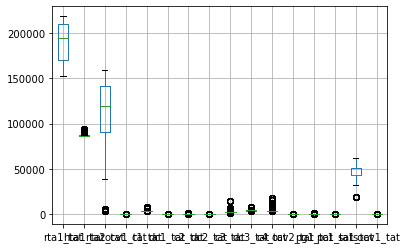

In [109]:
tat.boxplot()